In [48]:
import pandas as pd
import numpy as np
from plotnine import *
import xlrd
import random
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [49]:
#dataset paths
Icrisat="/content/ICRISAT-District Level Data.csv"
rainfall="/content/Monthly_Rainfall_From_1901_to_2017.csv"
shp_path = "/content/india_st.shp"
shx_path = "/content/india_st.shx"
dbf_path = "/content/india_st.dbf"
track="/content/track.csv"
fert="/content/fert.csv"

In [50]:
df= pd.read_csv(Icrisat)
print(len(df))
unique_states = df['State Name'].unique()
print(unique_states)

16146
['Chhattisgarh' 'Madhya Pradesh' 'Andhra Pradesh' 'Telangana' 'Karnataka'
 'Tamil Nadu' 'Maharashtra' 'Gujarat' 'Rajasthan' 'Punjab' 'Haryana'
 'Uttar Pradesh' 'Uttarakhand' 'Assam' 'Himachal Pradesh' 'Kerala'
 'Orissa' 'West Bengal' 'Bihar' 'Jharkhand']


In [51]:
# Grouping by State Name and aggregating the sum of AREA, PRODUCTION, and YIELD for each state
df1 = df.groupby(['Year','State Code' ,'State Name']).agg({
    'RICE AREA (1000 ha)': 'sum',
    'RICE PRODUCTION (1000 tons)': 'sum',
    'RICE YIELD (Kg per ha)': 'sum',
    'WHEAT AREA (1000 ha)': 'sum',
    'WHEAT PRODUCTION (1000 tons)': 'sum',
    'WHEAT YIELD (Kg per ha)': 'sum',
    'KHARIF SORGHUM AREA (1000 ha)': 'sum',
    'KHARIF SORGHUM PRODUCTION (1000 tons)': 'sum',
    'KHARIF SORGHUM YIELD (Kg per ha)': 'sum',
    'RABI SORGHUM AREA (1000 ha)': 'sum',
    'RABI SORGHUM PRODUCTION (1000 tons)': 'sum',
    'RABI SORGHUM YIELD (Kg per ha)': 'sum',
    'SORGHUM AREA (1000 ha)': 'sum',
    'SORGHUM PRODUCTION (1000 tons)': 'sum',
    'SORGHUM YIELD (Kg per ha)': 'sum',
    'PEARL MILLET AREA (1000 ha)': 'sum',
    'PEARL MILLET PRODUCTION (1000 tons)': 'sum',
    'PEARL MILLET YIELD (Kg per ha)': 'sum',
    'MAIZE AREA (1000 ha)': 'sum',
    'MAIZE PRODUCTION (1000 tons)': 'sum',
    'MAIZE YIELD (Kg per ha)': 'sum',
    'FINGER MILLET AREA (1000 ha)': 'sum',
    'FINGER MILLET PRODUCTION (1000 tons)': 'sum',
    'FINGER MILLET YIELD (Kg per ha)': 'sum',
    'BARLEY AREA (1000 ha)': 'sum',
    'BARLEY PRODUCTION (1000 tons)': 'sum',
    'BARLEY YIELD (Kg per ha)': 'sum',
    'CHICKPEA AREA (1000 ha)': 'sum',
    'CHICKPEA PRODUCTION (1000 tons)': 'sum',
    'CHICKPEA YIELD (Kg per ha)': 'sum',
    'PIGEONPEA AREA (1000 ha)': 'sum',
    'PIGEONPEA PRODUCTION (1000 tons)': 'sum',
    'PIGEONPEA YIELD (Kg per ha)': 'sum',
    'MINOR PULSES AREA (1000 ha)': 'sum',
    'MINOR PULSES PRODUCTION (1000 tons)': 'sum',
    'MINOR PULSES YIELD (Kg per ha)': 'sum',
    'GROUNDNUT AREA (1000 ha)': 'sum',
    'GROUNDNUT PRODUCTION (1000 tons)': 'sum',
    'GROUNDNUT YIELD (Kg per ha)': 'sum',
    'SESAMUM AREA (1000 ha)': 'sum',
    'SESAMUM PRODUCTION (1000 tons)': 'sum',
    'SESAMUM YIELD (Kg per ha)': 'sum',
    'RAPESEED AND MUSTARD AREA (1000 ha)': 'sum',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)': 'sum',
    'RAPESEED AND MUSTARD YIELD (Kg per ha)': 'sum',
    'SAFFLOWER AREA (1000 ha)': 'sum',
    'SAFFLOWER PRODUCTION (1000 tons)': 'sum',
    'SAFFLOWER YIELD (Kg per ha)': 'sum',
    'CASTOR AREA (1000 ha)': 'sum',
    'CASTOR PRODUCTION (1000 tons)': 'sum',
    'CASTOR YIELD (Kg per ha)': 'sum',
    'LINSEED AREA (1000 ha)': 'sum',
    'LINSEED PRODUCTION (1000 tons)': 'sum',
    'LINSEED YIELD (Kg per ha)': 'sum',
    'SUNFLOWER AREA (1000 ha)': 'sum',
    'SUNFLOWER PRODUCTION (1000 tons)': 'sum',
    'SUNFLOWER YIELD (Kg per ha)': 'sum',
    'SOYABEAN AREA (1000 ha)': 'sum',
    'SOYABEAN PRODUCTION (1000 tons)': 'sum',
    'SOYABEAN YIELD (Kg per ha)': 'sum',
    'OILSEEDS AREA (1000 ha)': 'sum',
    'OILSEEDS PRODUCTION (1000 tons)': 'sum',
    'OILSEEDS YIELD (Kg per ha)': 'sum',
    'SUGARCANE AREA (1000 ha)': 'sum',
    'SUGARCANE PRODUCTION (1000 tons)': 'sum',
    'SUGARCANE YIELD (Kg per ha)': 'sum',
    'COTTON AREA (1000 ha)': 'sum',
    'COTTON PRODUCTION (1000 tons)': 'sum',
    'COTTON YIELD (Kg per ha)': 'sum',
    'FRUITS AREA (1000 ha)': 'sum',
    'VEGETABLES AREA (1000 ha)': 'sum',
    'FRUITS AND VEGETABLES AREA (1000 ha)': 'sum',
    'POTATOES AREA (1000 ha)': 'sum',
    'ONION AREA (1000 ha)': 'sum',
    'FODDER AREA (1000 ha)': 'sum'
}).reset_index()

In [52]:
df1.head()

Year  State Code      State Name  RICE AREA (1000 ha)  \
0  1966           1  Andhra Pradesh              2401.00   
1  1966           2           Bihar              2915.46   
2  1966           3         Gujarat               510.00   
3  1966           4         Haryana               197.60   
4  1966           5       Karnataka              1192.00   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                      3214.00                14803.01                  2.50   
1                       946.67                 3435.90                801.76   
2                       301.30                 9854.83                433.80   
3                       226.20                 6894.04                772.70   
4                      1649.00                26241.30                288.30   

   WHEAT PRODUCTION (1000 tons)  WHEAT YIELD (Kg per ha)  \
0                          0.60                  1412.59   
1                        362.84                  4652.25   
2                        459.30                 17450.88   
3                       1104.00                 10164.25   
4                         43.30                  2620.93   

   KHARIF SORGHUM AREA (1000 ha)  ...  SUGARCANE YIELD (Kg per ha)  \
0                          531.9  ...                     87233.60   
1                            0.0  ...                     29441.61   
2                         1135.6  ...                     79966.42   
3                          269.8  ...                     22829.26   
4                         1259.8  ...                    166638.51   

   COTTON AREA (1000 ha)  COTTON PRODUCTION (1000 tons)  \
0                  220.0                           14.7   
1                    0.0                            0.0   
2                 1731.0                          252.0   
3                  186.0                           54.3   
4                  980.1                           49.3   

   COTTON YIELD (Kg per ha)  FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
0                    413.30                 176.96                      50.74   
1                      0.00                 135.92                     216.33   
2                   2331.08                  43.48                      37.58   
3                   1373.50                  10.80                      24.12   
4                    546.02                  63.82                      63.13   

   FRUITS AND VEGETABLES AREA (1000 ha)  POTATOES AREA (1000 ha)  \
0                                227.69                     0.19   
1                                352.24                    79.04   
2                                 81.02                     2.63   
3                                 34.91                     3.70   
4                                126.94                     7.64   

   ONION AREA (1000 ha)  FODDER AREA (1000 ha)  
0                  9.82                 128.57  
1                 10.36                 -11.00  
2                  5.65                 903.10  
3                  5.89                 471.70  
4                 23.07                 149.46  

[5 rows x 78 columns]

In [53]:
df_2017 = df1[df1['Year'] == 2017]
# Grouping by State Name and aggregating the sum of production for each crop
crop_columns = [col for col in df_2017.columns if 'PRODUCTION' in col]
crop_production = df_2017.groupby('State Name')[crop_columns].sum().reset_index()
# Reshaping the dataframe for plotting
crop_production_melted = crop_production.melt(id_vars='State Name', var_name='Crop', value_name='Production')


In [54]:
area_columns = [col for col in df_2017.columns if 'AREA' in col]
crop_area = df_2017.groupby('State Name')[area_columns].sum().reset_index()
# Reshaping the dataframe for plotting
crop_area_melted = crop_area.melt(id_vars='State Name', var_name='Crop', value_name='Area')


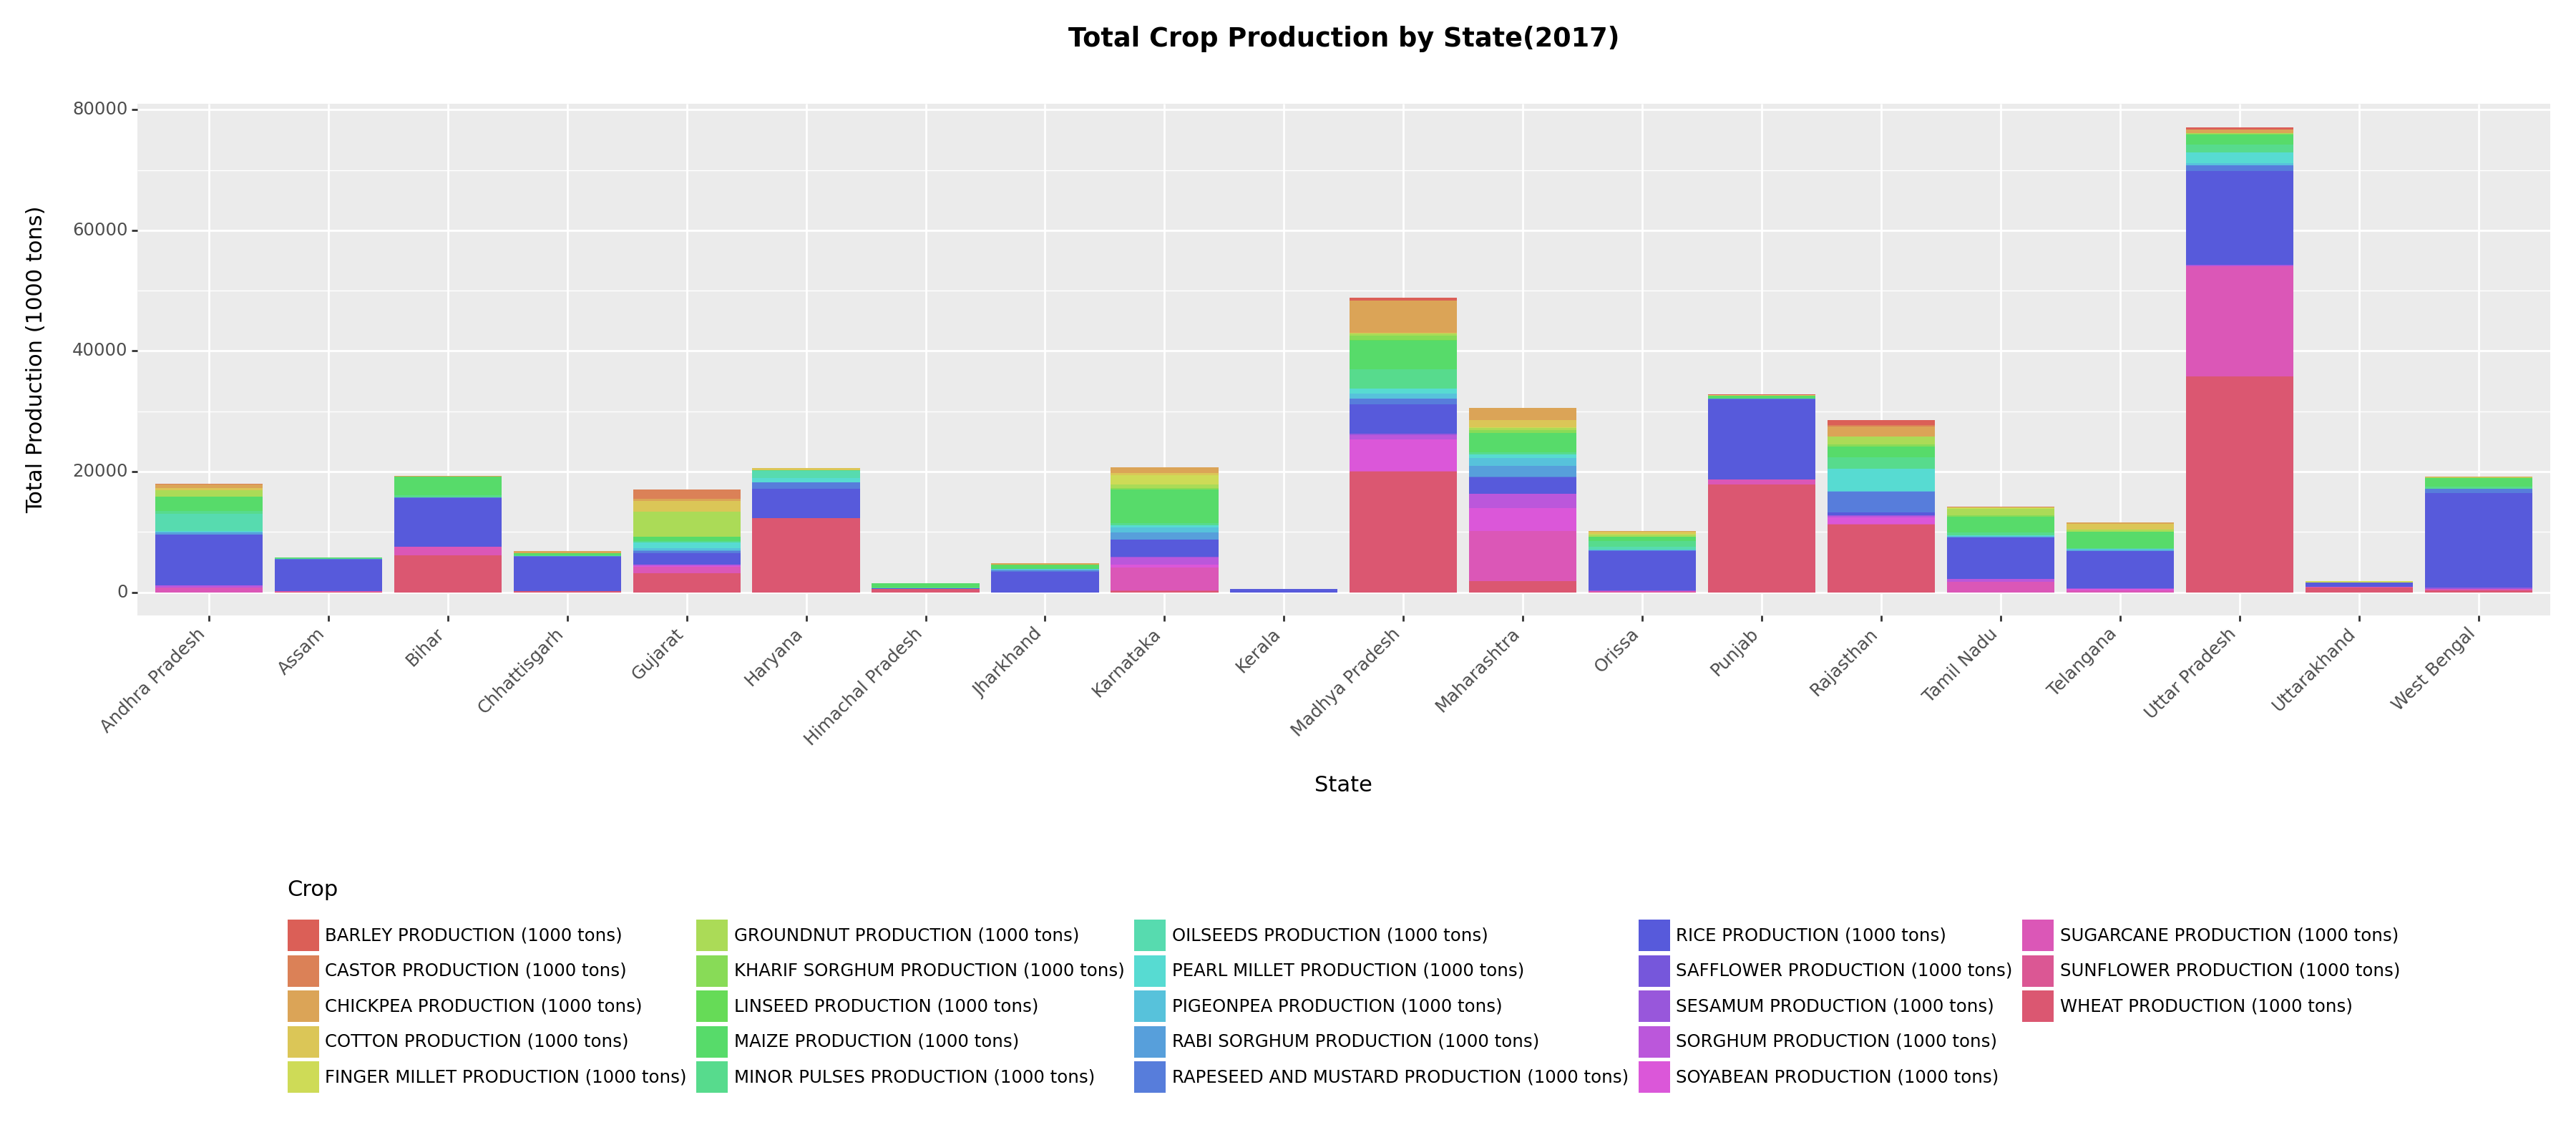

<Figure Size: (1800 x 800)>

In [55]:
(
    ggplot(crop_production_melted, aes(x='State Name', y='Production', fill='Crop')) +
    geom_bar(stat='identity') +
    labs(title='Total Crop Production by State(2017)', x='State', y='Total Production (1000 tons)') +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    theme(legend_position='bottom')+
    theme(figure_size=(18, 8)) +
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

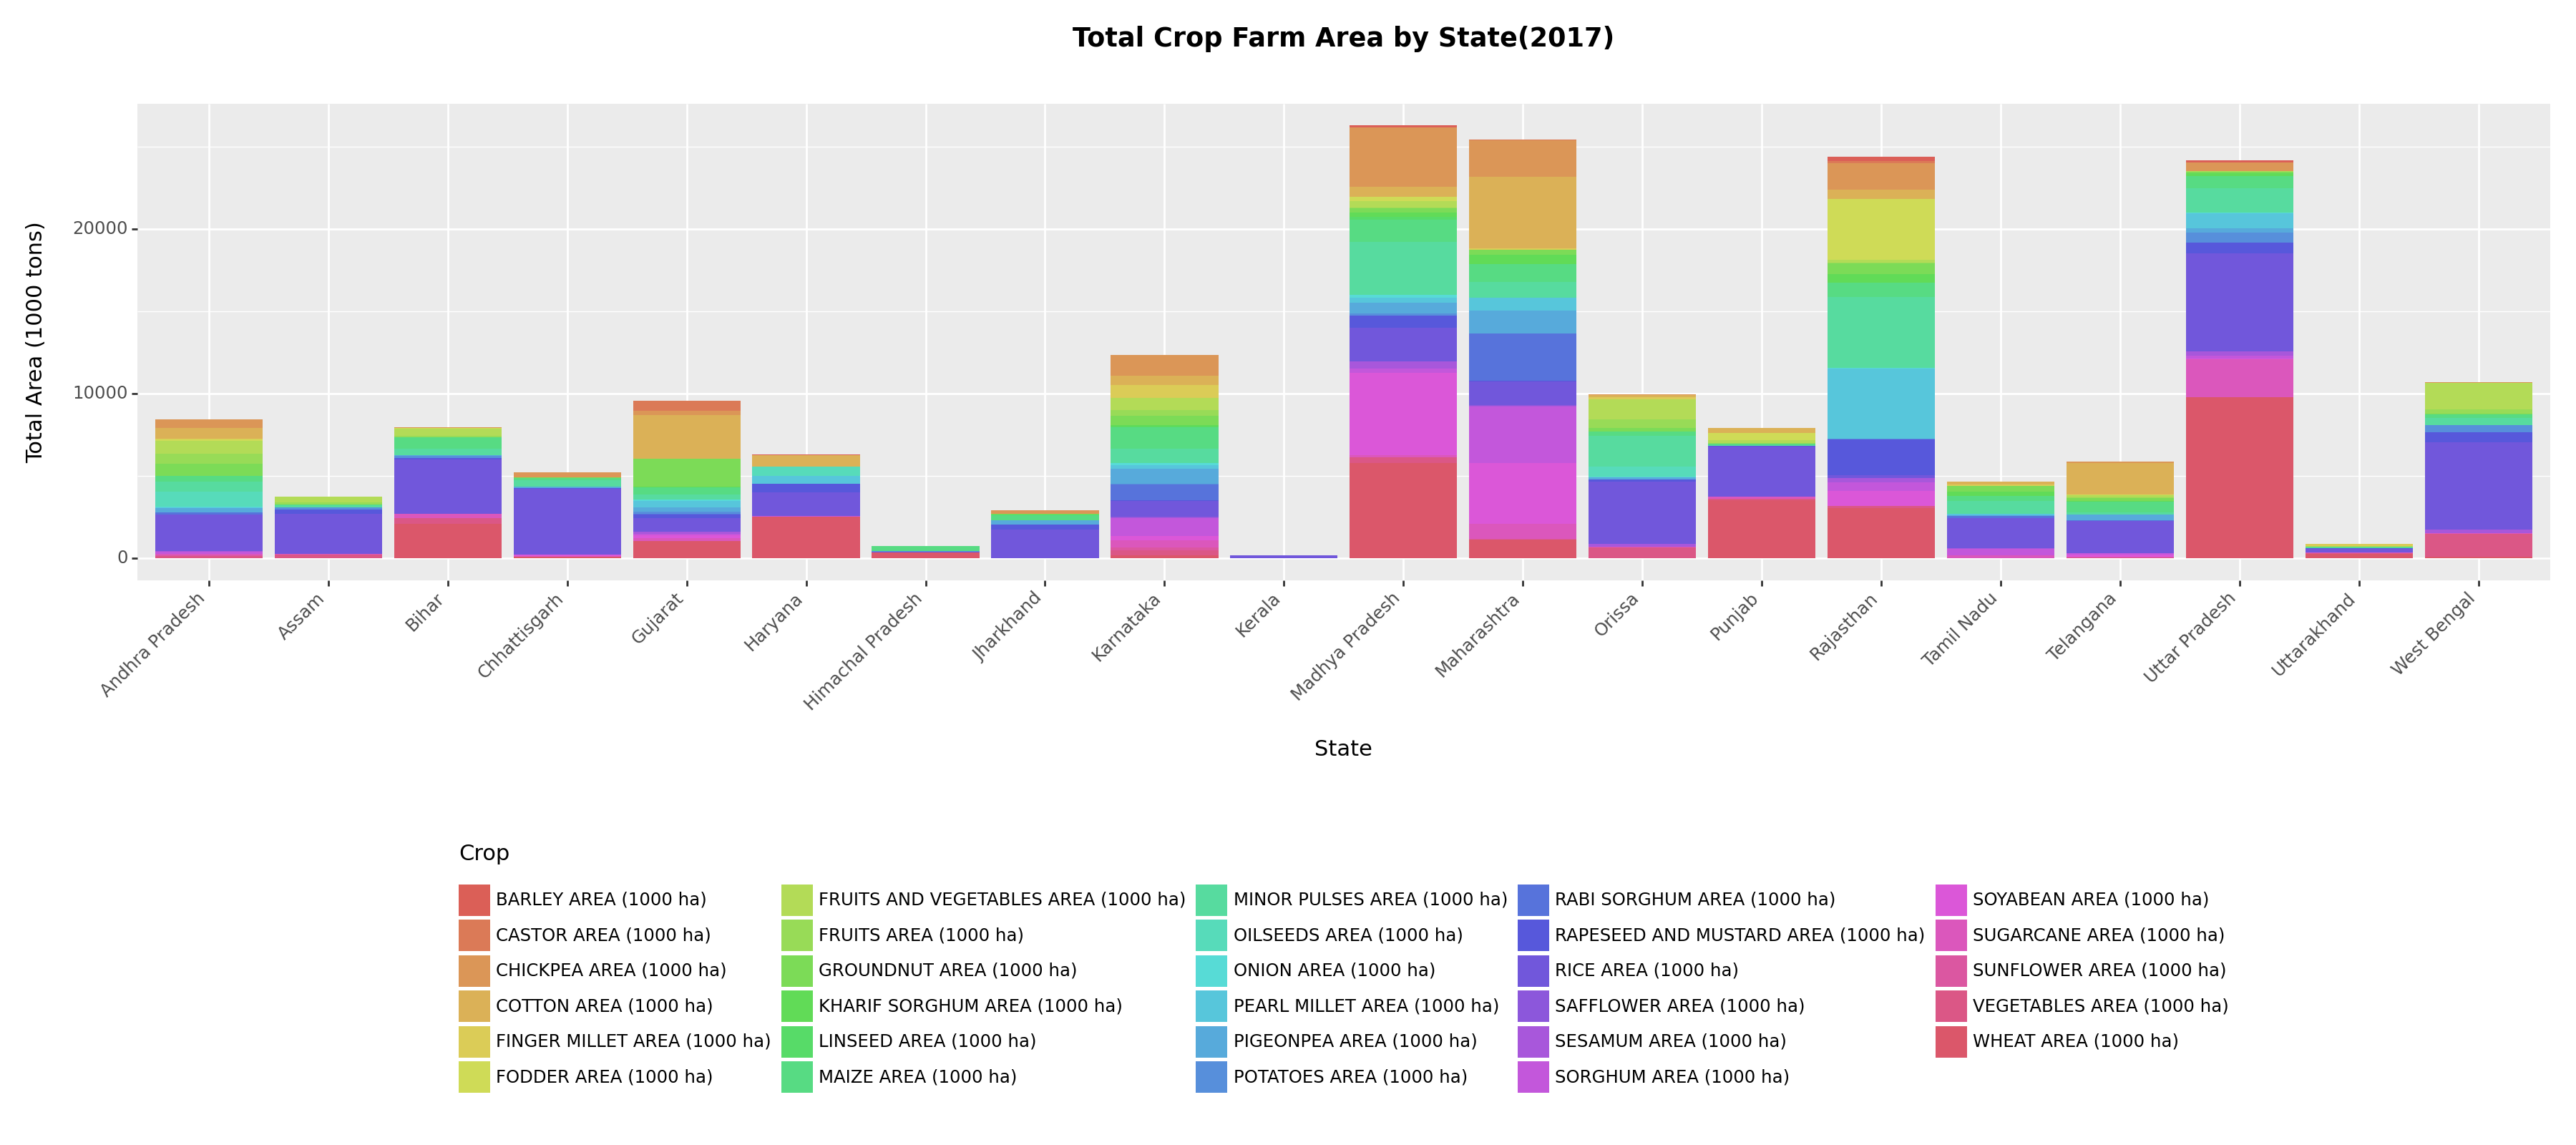

<Figure Size: (1800 x 800)>

In [56]:
(
    ggplot(crop_area_melted, aes(x='State Name', y='Area', fill='Crop')) +
    geom_bar(stat='identity') +
    labs(title='Total Crop Farm Area by State(2017)', x='State', y='Total Area (1000 tons)') +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    theme(legend_position='bottom')+
    theme(figure_size=(18, 8)) +
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

In [57]:
columns_to_select = [
    'State Name',
    'RICE PRODUCTION (1000 tons)',
    'WHEAT PRODUCTION (1000 tons)',
    'KHARIF SORGHUM PRODUCTION (1000 tons)',
    'RABI SORGHUM PRODUCTION (1000 tons)',
    'SORGHUM PRODUCTION (1000 tons)',
    'PEARL MILLET PRODUCTION (1000 tons)',
    'MAIZE PRODUCTION (1000 tons)',
    'FINGER MILLET PRODUCTION (1000 tons)',
    'BARLEY PRODUCTION (1000 tons)',
    'CHICKPEA PRODUCTION (1000 tons)',
    'PIGEONPEA PRODUCTION (1000 tons)',
    'MINOR PULSES PRODUCTION (1000 tons)',
    'GROUNDNUT PRODUCTION (1000 tons)',
    'SESAMUM PRODUCTION (1000 tons)',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)',
    'SAFFLOWER PRODUCTION (1000 tons)',
    'CASTOR PRODUCTION (1000 tons)',
    'LINSEED PRODUCTION (1000 tons)',
    'SUNFLOWER PRODUCTION (1000 tons)',
    'SOYABEAN PRODUCTION (1000 tons)',
    'OILSEEDS PRODUCTION (1000 tons)',
    'SUGARCANE PRODUCTION (1000 tons)',
    'COTTON PRODUCTION (1000 tons)',
]

# Create a new DataFrame with selected columns
cropprod = df_2017[columns_to_select].copy()

cropprod.head()


State Name  RICE PRODUCTION (1000 tons)  \
1018  Andhra Pradesh                      8461.34   
1019           Bihar                      8093.16   
1020         Gujarat                      1889.81   
1021         Haryana                      4880.00   
1022       Karnataka                      2907.51   

      WHEAT PRODUCTION (1000 tons)  KHARIF SORGHUM PRODUCTION (1000 tons)  \
1018                          0.04                                  30.23   
1019                       6104.30                                   1.45   
1020                       3101.06                                  93.35   
1021                      12263.00                                   0.00   
1022                        219.08                                 153.03   

      RABI SORGHUM PRODUCTION (1000 tons)  SORGHUM PRODUCTION (1000 tons)  \
1018                               302.47                          332.69   
1019                                 0.00                            1.45   
1020                                31.98                          125.32   
1021                                 0.00                           24.00   
1022                              1110.99                         1264.02   

      PEARL MILLET PRODUCTION (1000 tons)  MAIZE PRODUCTION (1000 tons)  \
1018                                93.18                       2325.90   
1019                                 4.97                       3120.75   
1020                               964.93                        714.76   
1021                               721.00                         19.00   
1022                               367.25                       5610.67   

      FINGER MILLET PRODUCTION (1000 tons)  BARLEY PRODUCTION (1000 tons)  \
1018                                 44.00                           0.00   
1019                                  4.18                          16.47   
1020                                 10.65                           0.00   
1021                                  0.00                          69.00   
1022                               1568.28                           0.00   

      ...  SESAMUM PRODUCTION (1000 tons)  \
1018  ...                           10.90   
1019  ...                            1.37   
1020  ...                           79.21   
1021  ...                            0.70   
1022  ...                           31.25   

      RAPESEED AND MUSTARD PRODUCTION (1000 tons)  \
1018                                         1.37   
1019                                        98.48   
1020                                       400.07   
1021                                      1107.50   
1022                                         0.38   

      SAFFLOWER PRODUCTION (1000 tons)  CASTOR PRODUCTION (1000 tons)  \
1018                              0.01                          20.84   
1019                              0.08                           0.02   
1020                              0.00                        1487.28   
1021                              0.00                           0.00   
1022                             30.34                           4.59   

      LINSEED PRODUCTION (1000 tons)  SUNFLOWER PRODUCTION (1000 tons)  \
1018                            0.10                             11.68   
1019                           10.32                             13.38   
1020                            0.00                              0.00   
1021                            0.00                              0.00   
1022                            0.80                            150.79   

      SOYABEAN PRODUCTION (1000 tons)  OILSEEDS PRODUCTION (1000 tons)  \
1018                             0.72                          2876.52   
1019                             0.00                             0.00   
1020                           137.33                             0.00   
1021                             0.00                          1134.70   
1022   

In [58]:
crop_production_columns = [
    'RICE PRODUCTION (1000 tons)',
    'WHEAT PRODUCTION (1000 tons)',
    'KHARIF SORGHUM PRODUCTION (1000 tons)',
    'RABI SORGHUM PRODUCTION (1000 tons)',
    'SORGHUM PRODUCTION (1000 tons)',
    'PEARL MILLET PRODUCTION (1000 tons)',
    'MAIZE PRODUCTION (1000 tons)',
    'FINGER MILLET PRODUCTION (1000 tons)',
    'BARLEY PRODUCTION (1000 tons)',
    'CHICKPEA PRODUCTION (1000 tons)',
    'PIGEONPEA PRODUCTION (1000 tons)',
    'MINOR PULSES PRODUCTION (1000 tons)',
    'GROUNDNUT PRODUCTION (1000 tons)',
    'SESAMUM PRODUCTION (1000 tons)',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)',
    'SAFFLOWER PRODUCTION (1000 tons)',
    'CASTOR PRODUCTION (1000 tons)',
    'LINSEED PRODUCTION (1000 tons)',
    'SUNFLOWER PRODUCTION (1000 tons)',
    'SOYABEAN PRODUCTION (1000 tons)',
    'OILSEEDS PRODUCTION (1000 tons)',
    'SUGARCANE PRODUCTION (1000 tons)',
    'COTTON PRODUCTION (1000 tons)'
]

crop_production_2017 = df_2017[crop_production_columns].sum()

# Find the top three crops with the highest total production in 2017
top_crops_2017 = crop_production_2017.nlargest(3)
largest_crop_2017 = top_crops_2017.index[0]
second_largest_crop_2017 = top_crops_2017.index[1]
third_largest_crop_2017 = top_crops_2017.index[2]

largest_crop_2017 = largest_crop_2017.split()[0]
second_largest_crop_2017 = second_largest_crop_2017.split()[0]
third_largest_crop_2017 = third_largest_crop_2017.split()[0]

print("The largest produced crop in India in 2017 is:", largest_crop_2017)
print("The second largest produced crop in India in 2017 is:", second_largest_crop_2017)
print("The third largest produced crop in India in 2017 is:", third_largest_crop_2017)

The largest produced crop in India in 2017 is: RICE
The second largest produced crop in India in 2017 is: WHEAT
The third largest produced crop in India in 2017 is: SUGARCANE


In [59]:
#Crop Analysis for selected crop
from ipywidgets import interact, Dropdown
# Function to plot the selected crop
def plot_crop(selected_crop):
    plt.figure(figsize=(12, 10))
    plt.bar(cropprod['State Name'], cropprod[selected_crop], color='orange')
    plt.title(f"{selected_crop} across States", fontsize=16, fontweight='bold')
    plt.xlabel("State")
    plt.ylabel("Production (1000 tons)")
    plt.xticks(rotation=65)
    plt.show()

crop_dropdown = Dropdown(options=crop_production_columns, description='Select Crop')

# Display interactive plot
interact(plot_crop, selected_crop=crop_dropdown)

interactive(children=(Dropdown(description='Select Crop', options=('RICE PRODUCTION (1000 tons)', 'WHEAT PRODU…

<function __main__.plot_crop(selected_crop)>

CROP ANALYSIS -
RICE

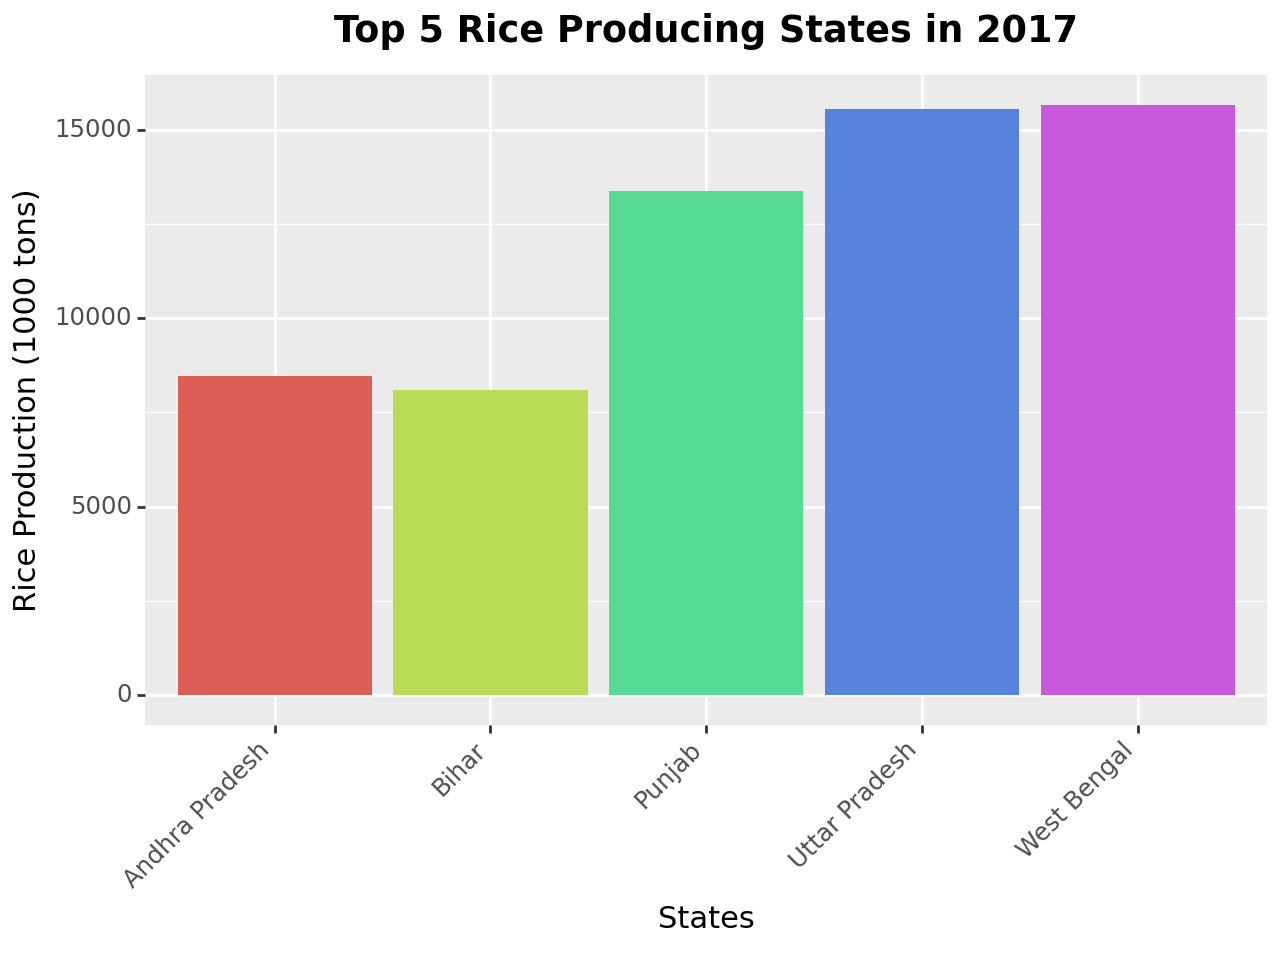

<Figure Size: (640 x 480)>

In [60]:

df_2017_ricesorted = df_2017.sort_values(by='RICE PRODUCTION (1000 tons)', ascending=False)

# Select top 5 rice-producing states
top_5_rice_states = df_2017_ricesorted.head(5)

(
    ggplot(top_5_rice_states, aes(x='State Name', y='RICE PRODUCTION (1000 tons)', fill='State Name')) +
    geom_bar(stat='identity') +
    labs(title='Top 5 Rice Producing States in 2017', x='States', y='Rice Production (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(legend_position='none')+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)


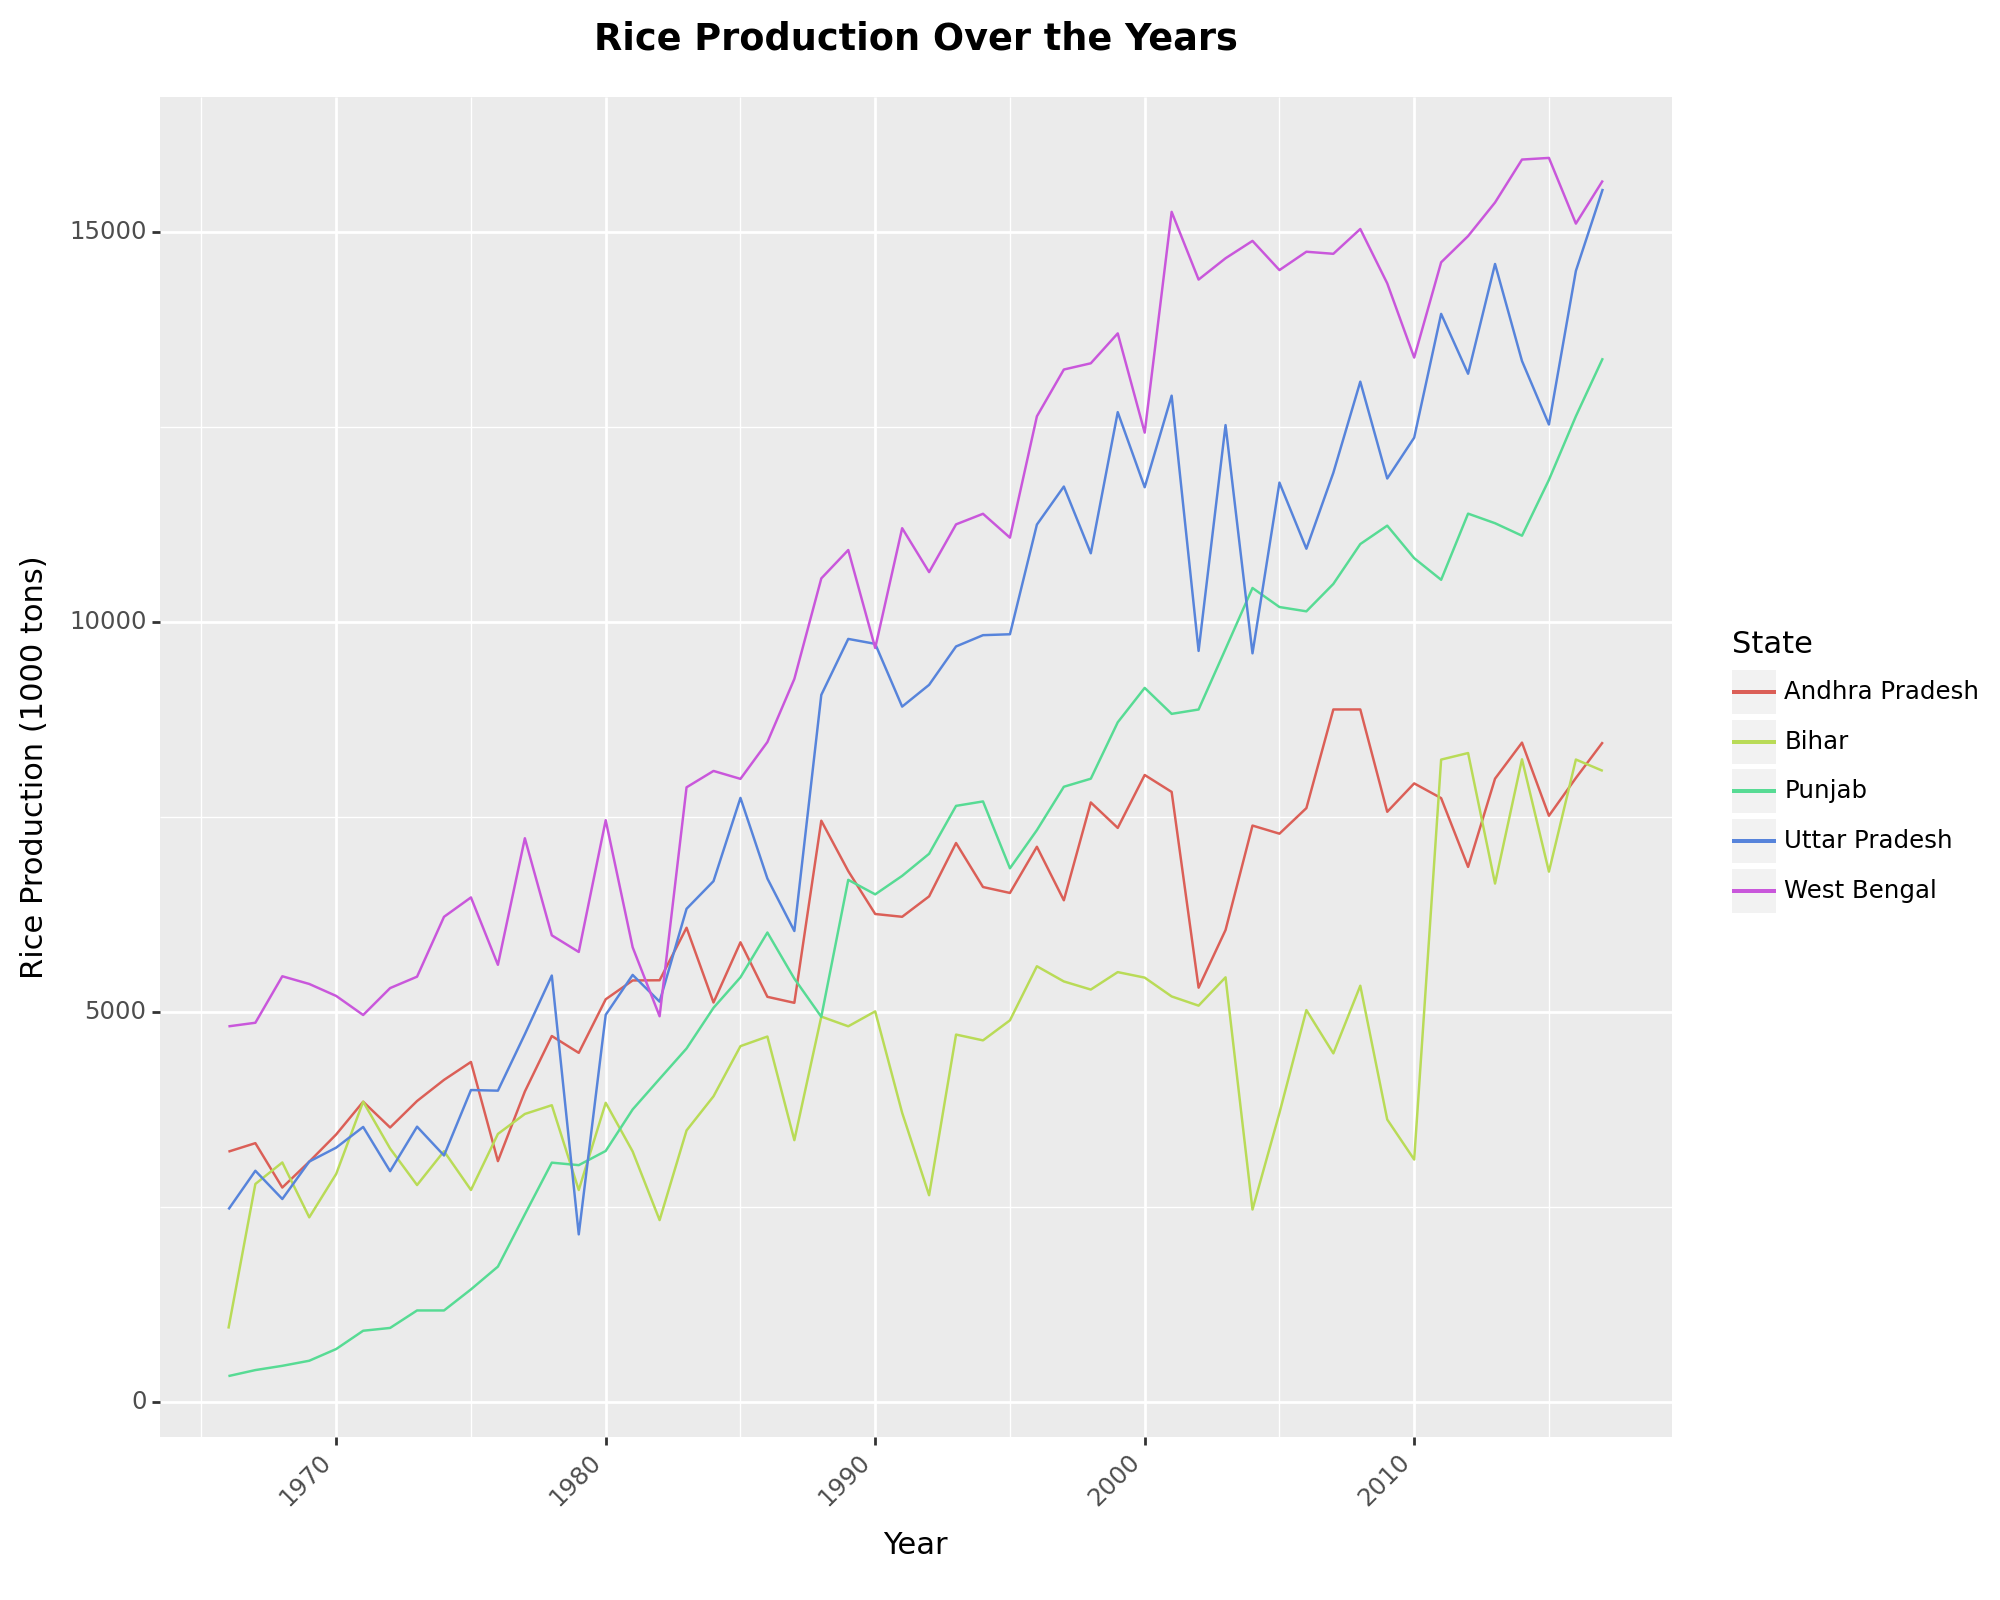

<Figure Size: (1000 x 800)>

In [61]:
#Plotting rice production over the years
selected_states = ['West Bengal', 'Uttar Pradesh', 'Punjab', 'Bihar', 'Andhra Pradesh']

dfrice = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'RICE PRODUCTION (1000 tons)']]
dfrice.columns = ['Year', 'State', 'RICE PRODUCTION (1000 tons)']
dfrice.reset_index(drop=True, inplace=True)

(
    ggplot(dfrice, aes(x='Year', y='RICE PRODUCTION (1000 tons)', color='State')) +
    geom_line() +
    labs(title='Rice Production Over the Years', x='Year', y='Rice Production (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

Green Revolution: Punjab was at the forefront of the Green Revolution in the 1960s and 1970s, which introduced high-yielding varieties of seeds, increased the use of fertilizers and pesticides, and improved irrigation infrastructure. This led to a significant increase in crop yields, especially for wheat and rice.

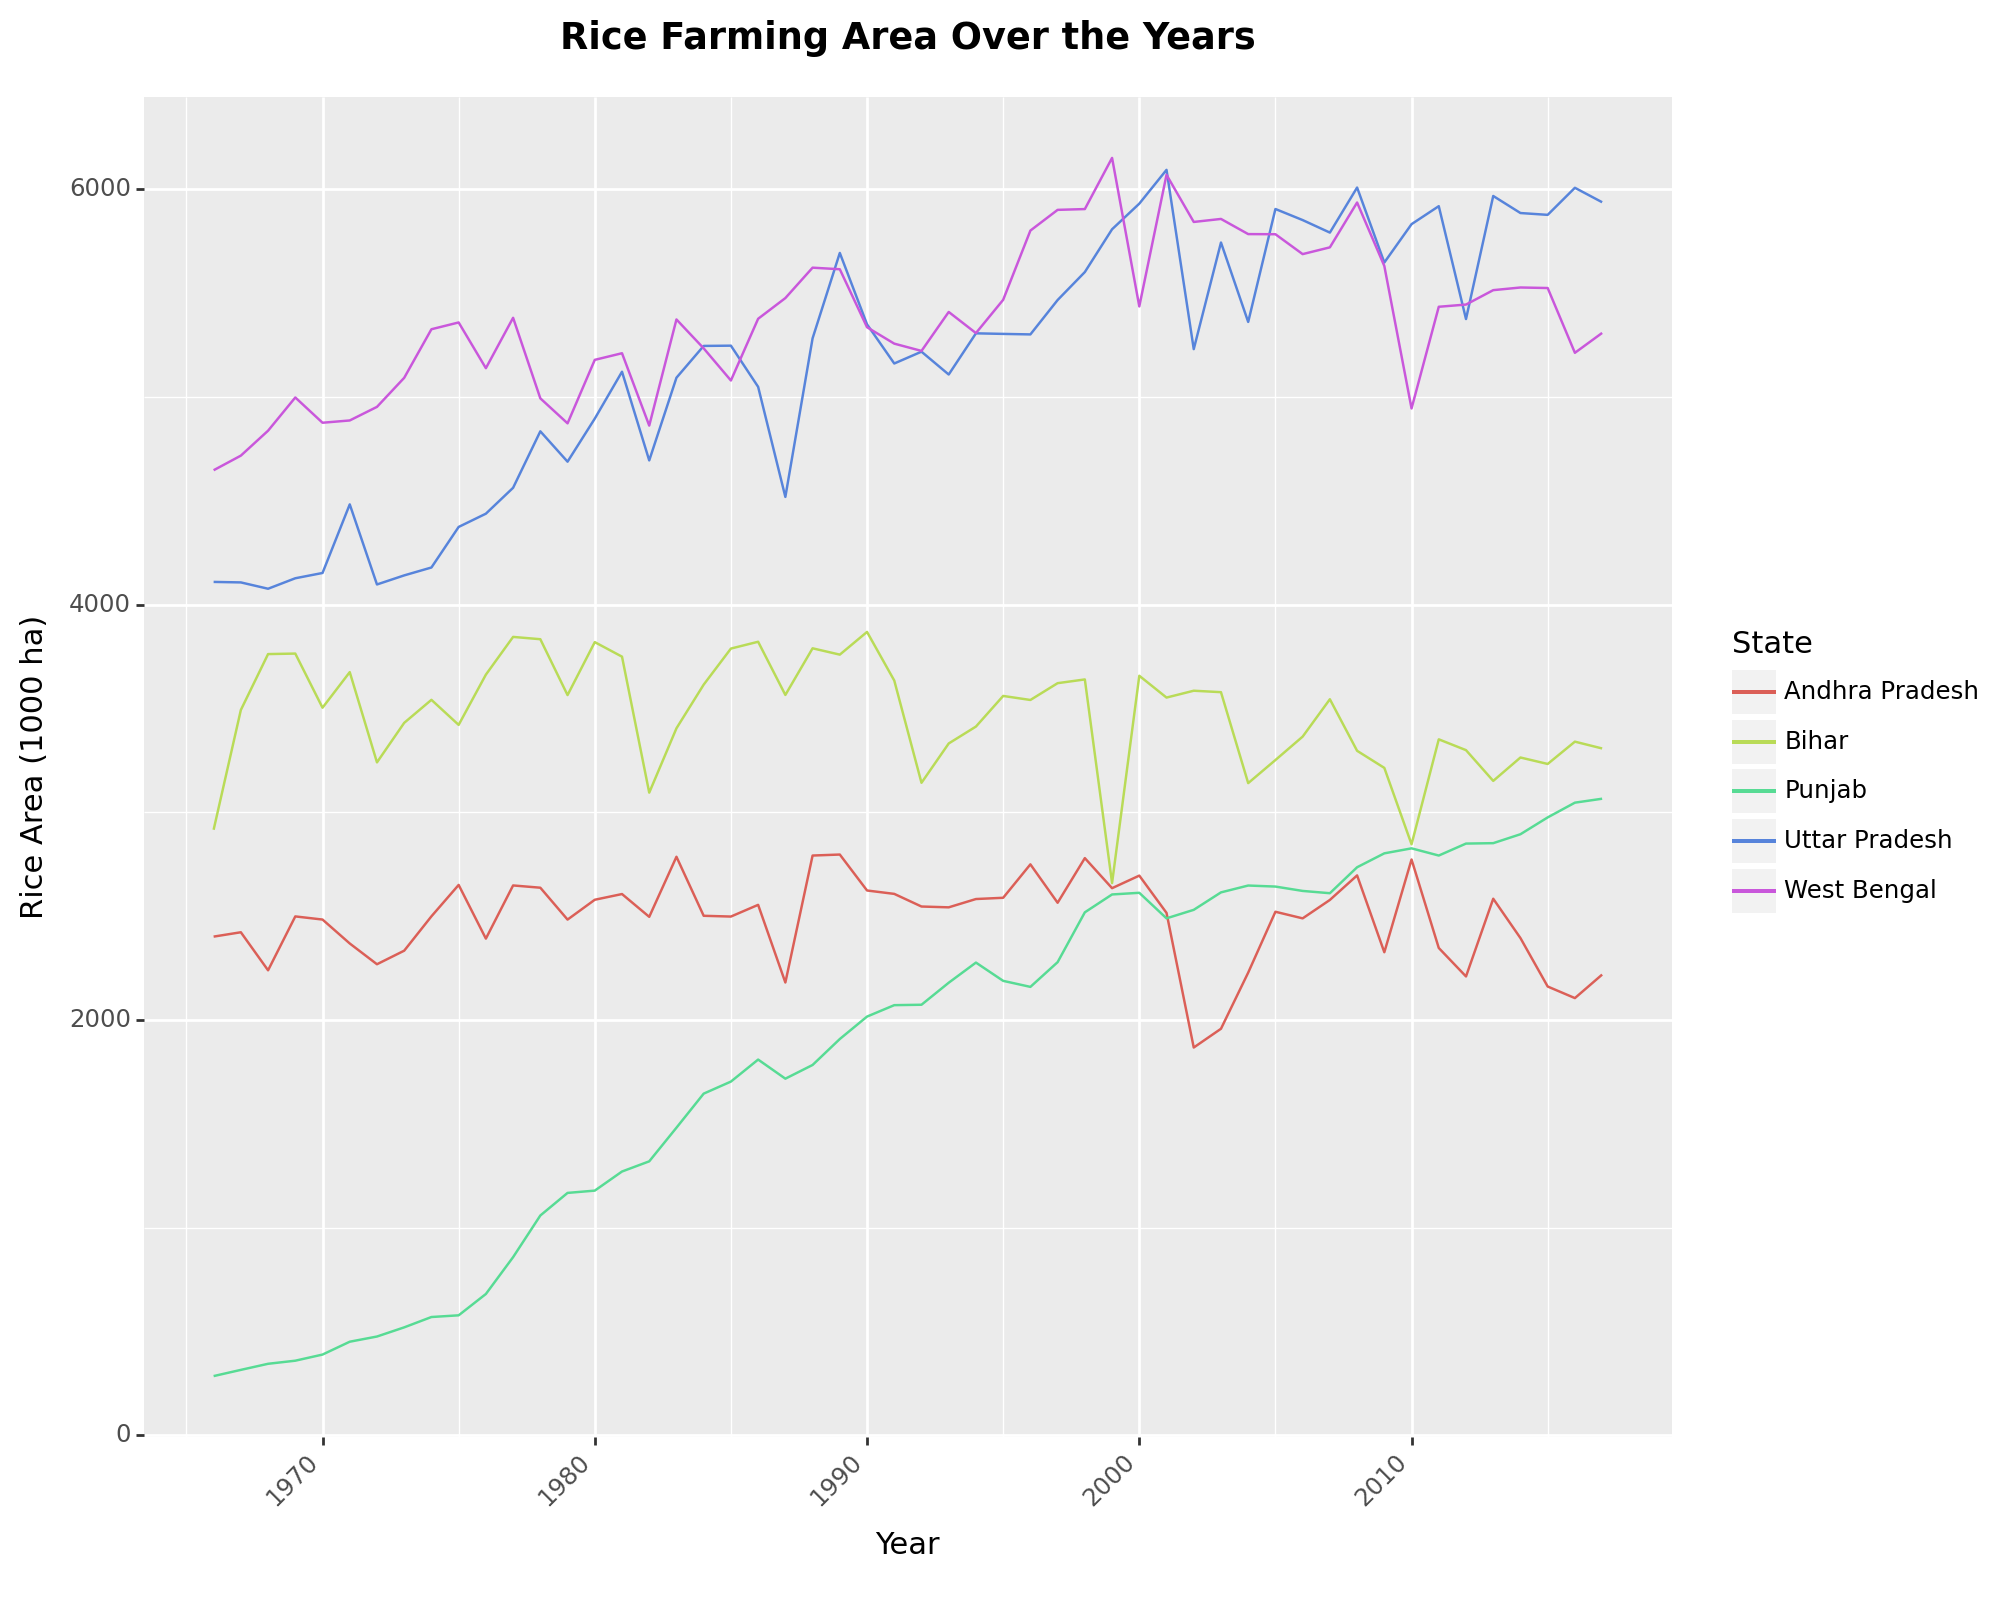

<Figure Size: (1000 x 800)>

In [62]:
#plotting to check why there was a growth in rice production in Punjab.
selected_states = ['West Bengal', 'Uttar Pradesh', 'Punjab', 'Bihar', 'Andhra Pradesh']


dfricea = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'RICE AREA (1000 ha)']]

dfricea.columns = ['Year', 'State', 'RICE AREA (1000 ha)']
dfricea.reset_index(drop=True, inplace=True)

(
    ggplot(dfricea, aes(x='Year', y='RICE AREA (1000 ha)', color='State')) +
    geom_line() +
    labs(title='Rice Farming Area Over the Years', x='Year', y='Rice Area (1000 ha)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)


Wheat

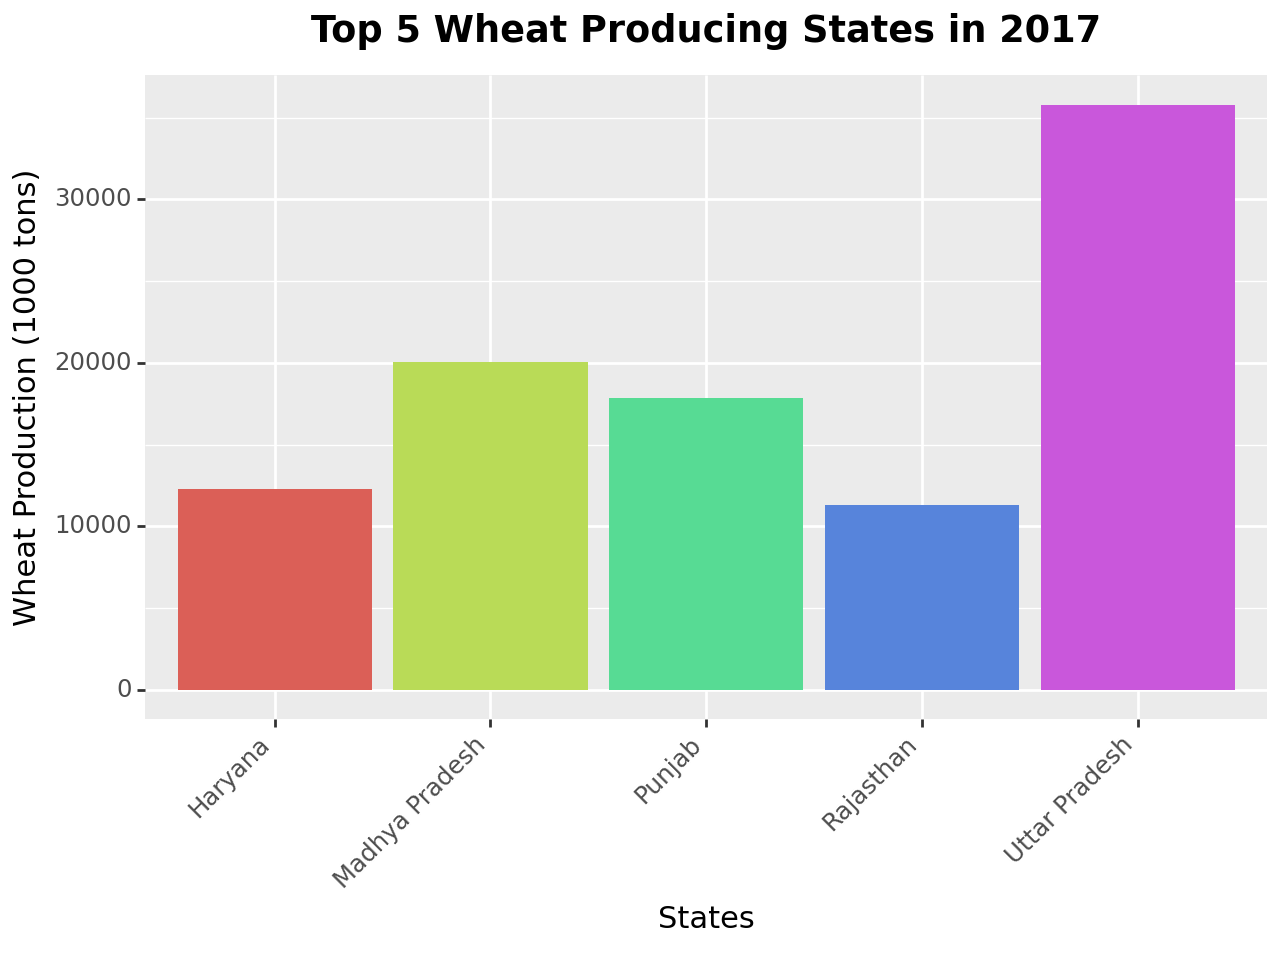

<Figure Size: (640 x 480)>

In [87]:

df_2017_wheatsorted = df_2017.sort_values(by='WHEAT PRODUCTION (1000 tons)', ascending=False)

# Select top 5 rice-producing states
top_5_wheat_states = df_2017_wheatsorted.head(5)
(
    ggplot(top_5_wheat_states, aes(x='State Name', y='WHEAT PRODUCTION (1000 tons)', fill='State Name')) +
    geom_bar(stat='identity') +
    labs(title='Top 5 Wheat Producing States in 2017', x='States', y='Wheat Production (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(legend_position='none')+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)


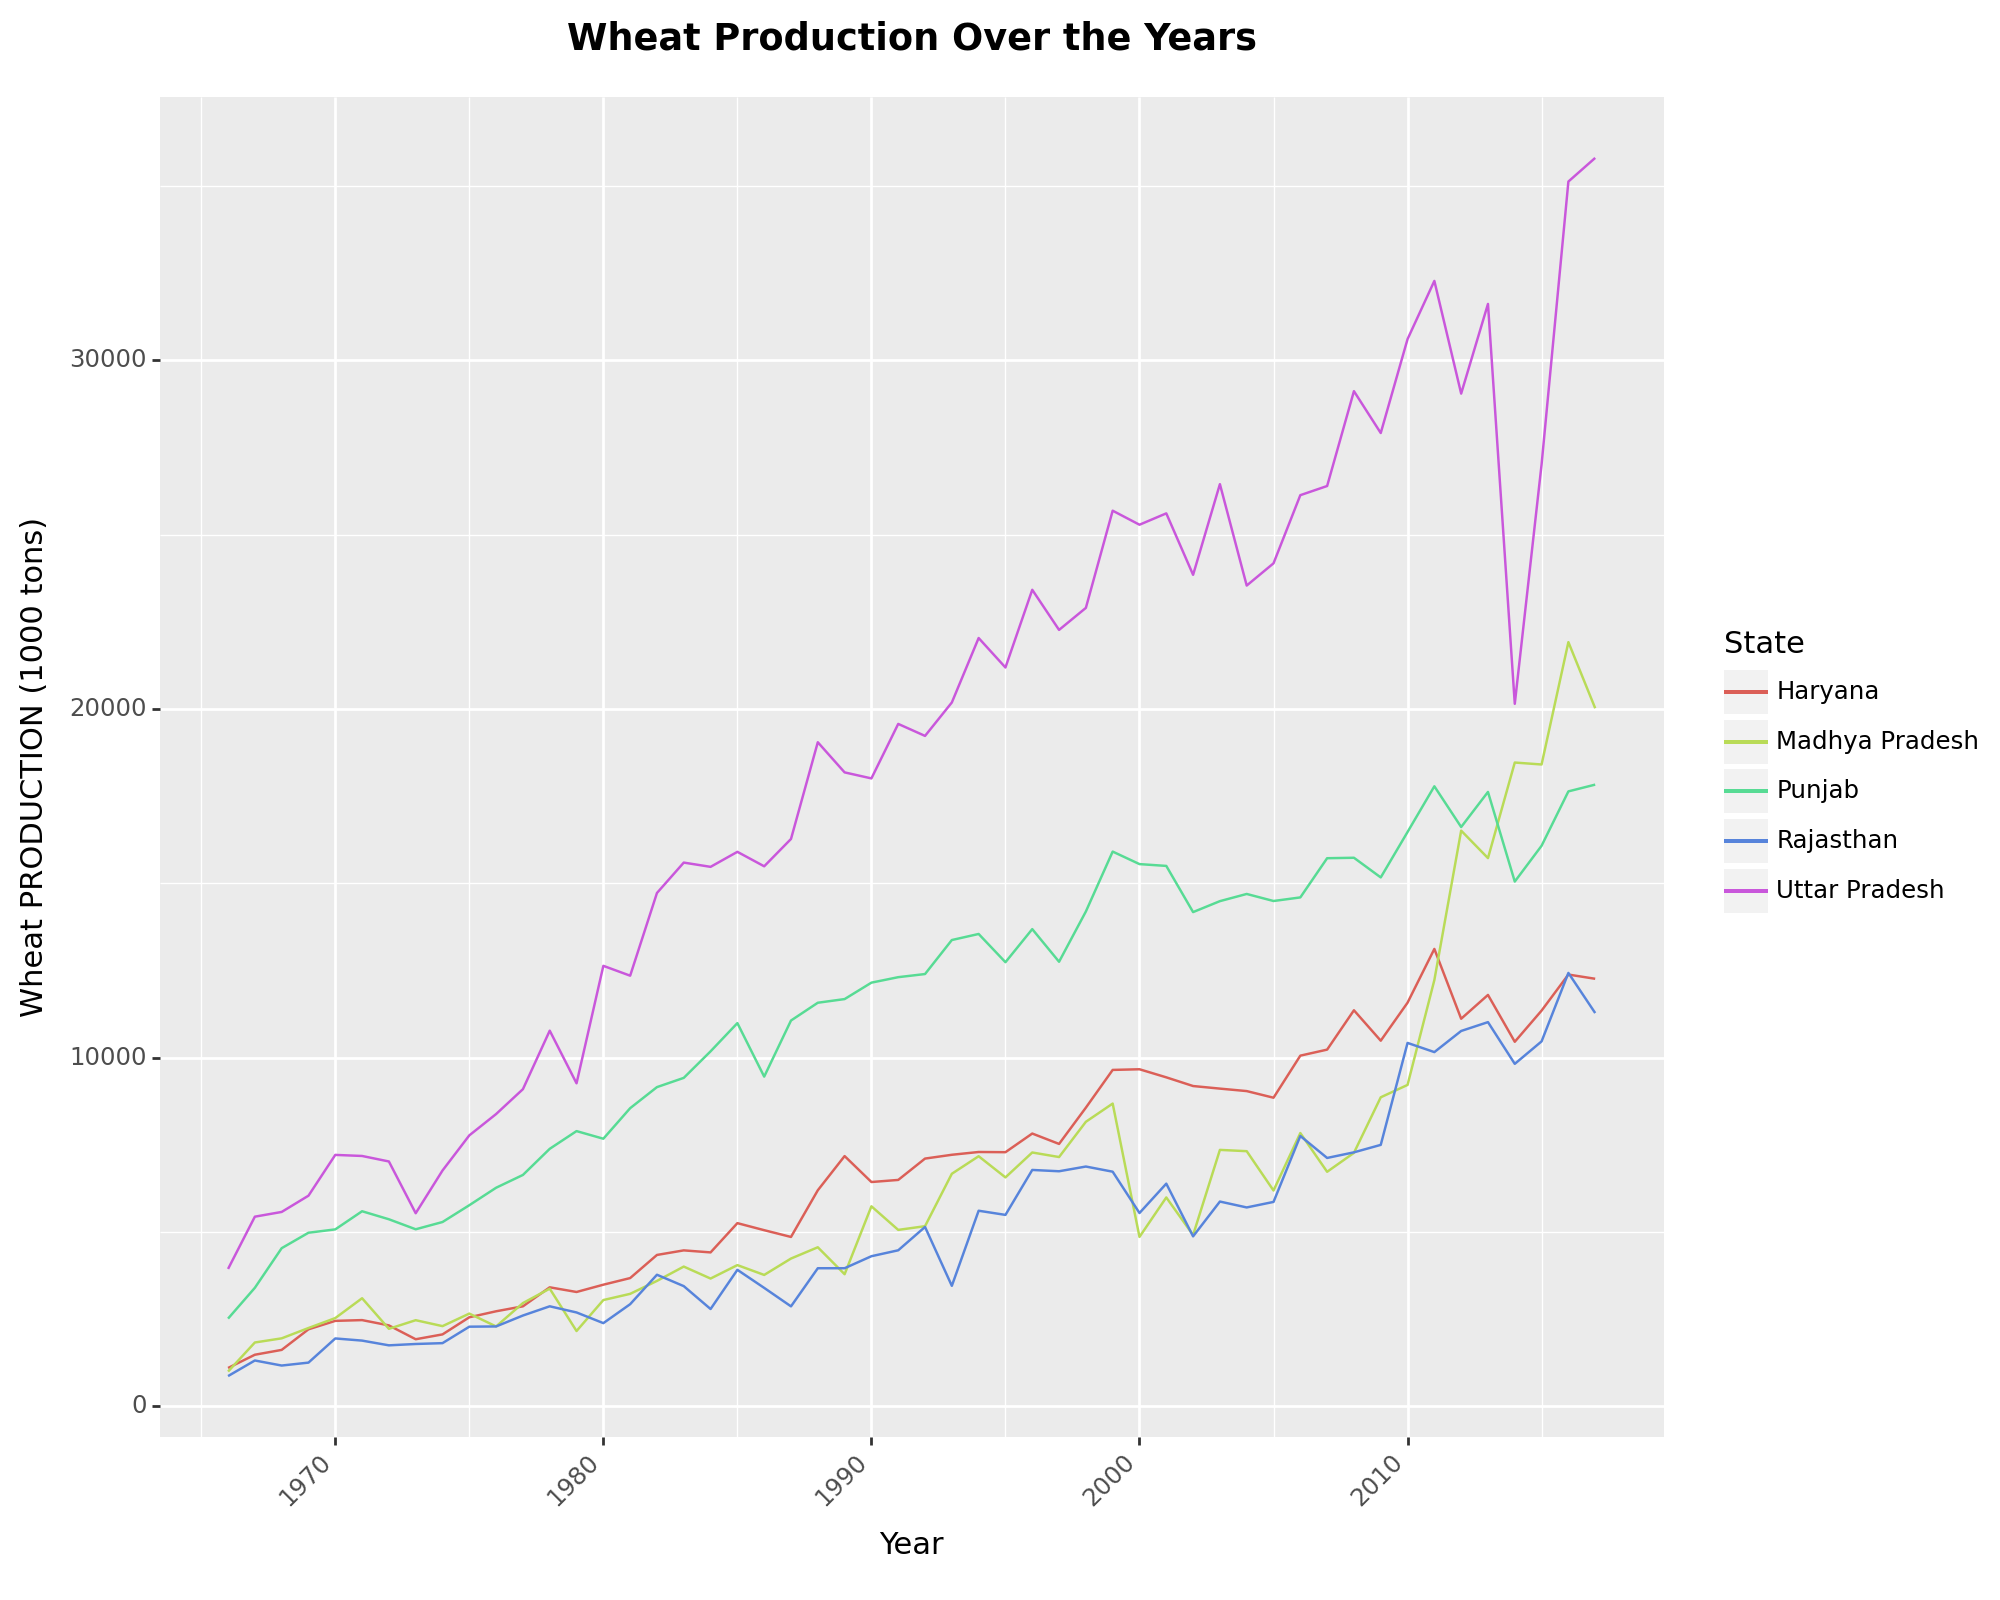

In [64]:
selected_states = ['Haryana', 'Uttar Pradesh', 'Punjab', 'Rajasthan', 'Madhya Pradesh']

# Filter the original dataset for selected states and relevant columns
dfwheat = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'WHEAT PRODUCTION (1000 tons)']]

# Rename columns for clarity
dfwheat.columns = ['Year', 'State', 'WHEAT PRODUCTION (1000 tons)']

# Reset index
dfwheat.reset_index(drop=True, inplace=True)
# Plotting
plot = (
    ggplot(dfwheat, aes(x='Year', y='WHEAT PRODUCTION (1000 tons)', color='State')) +
    geom_line() +
    labs(title='Wheat Production Over the Years', x='Year', y='Wheat PRODUCTION (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

# Display the plot
print(plot)

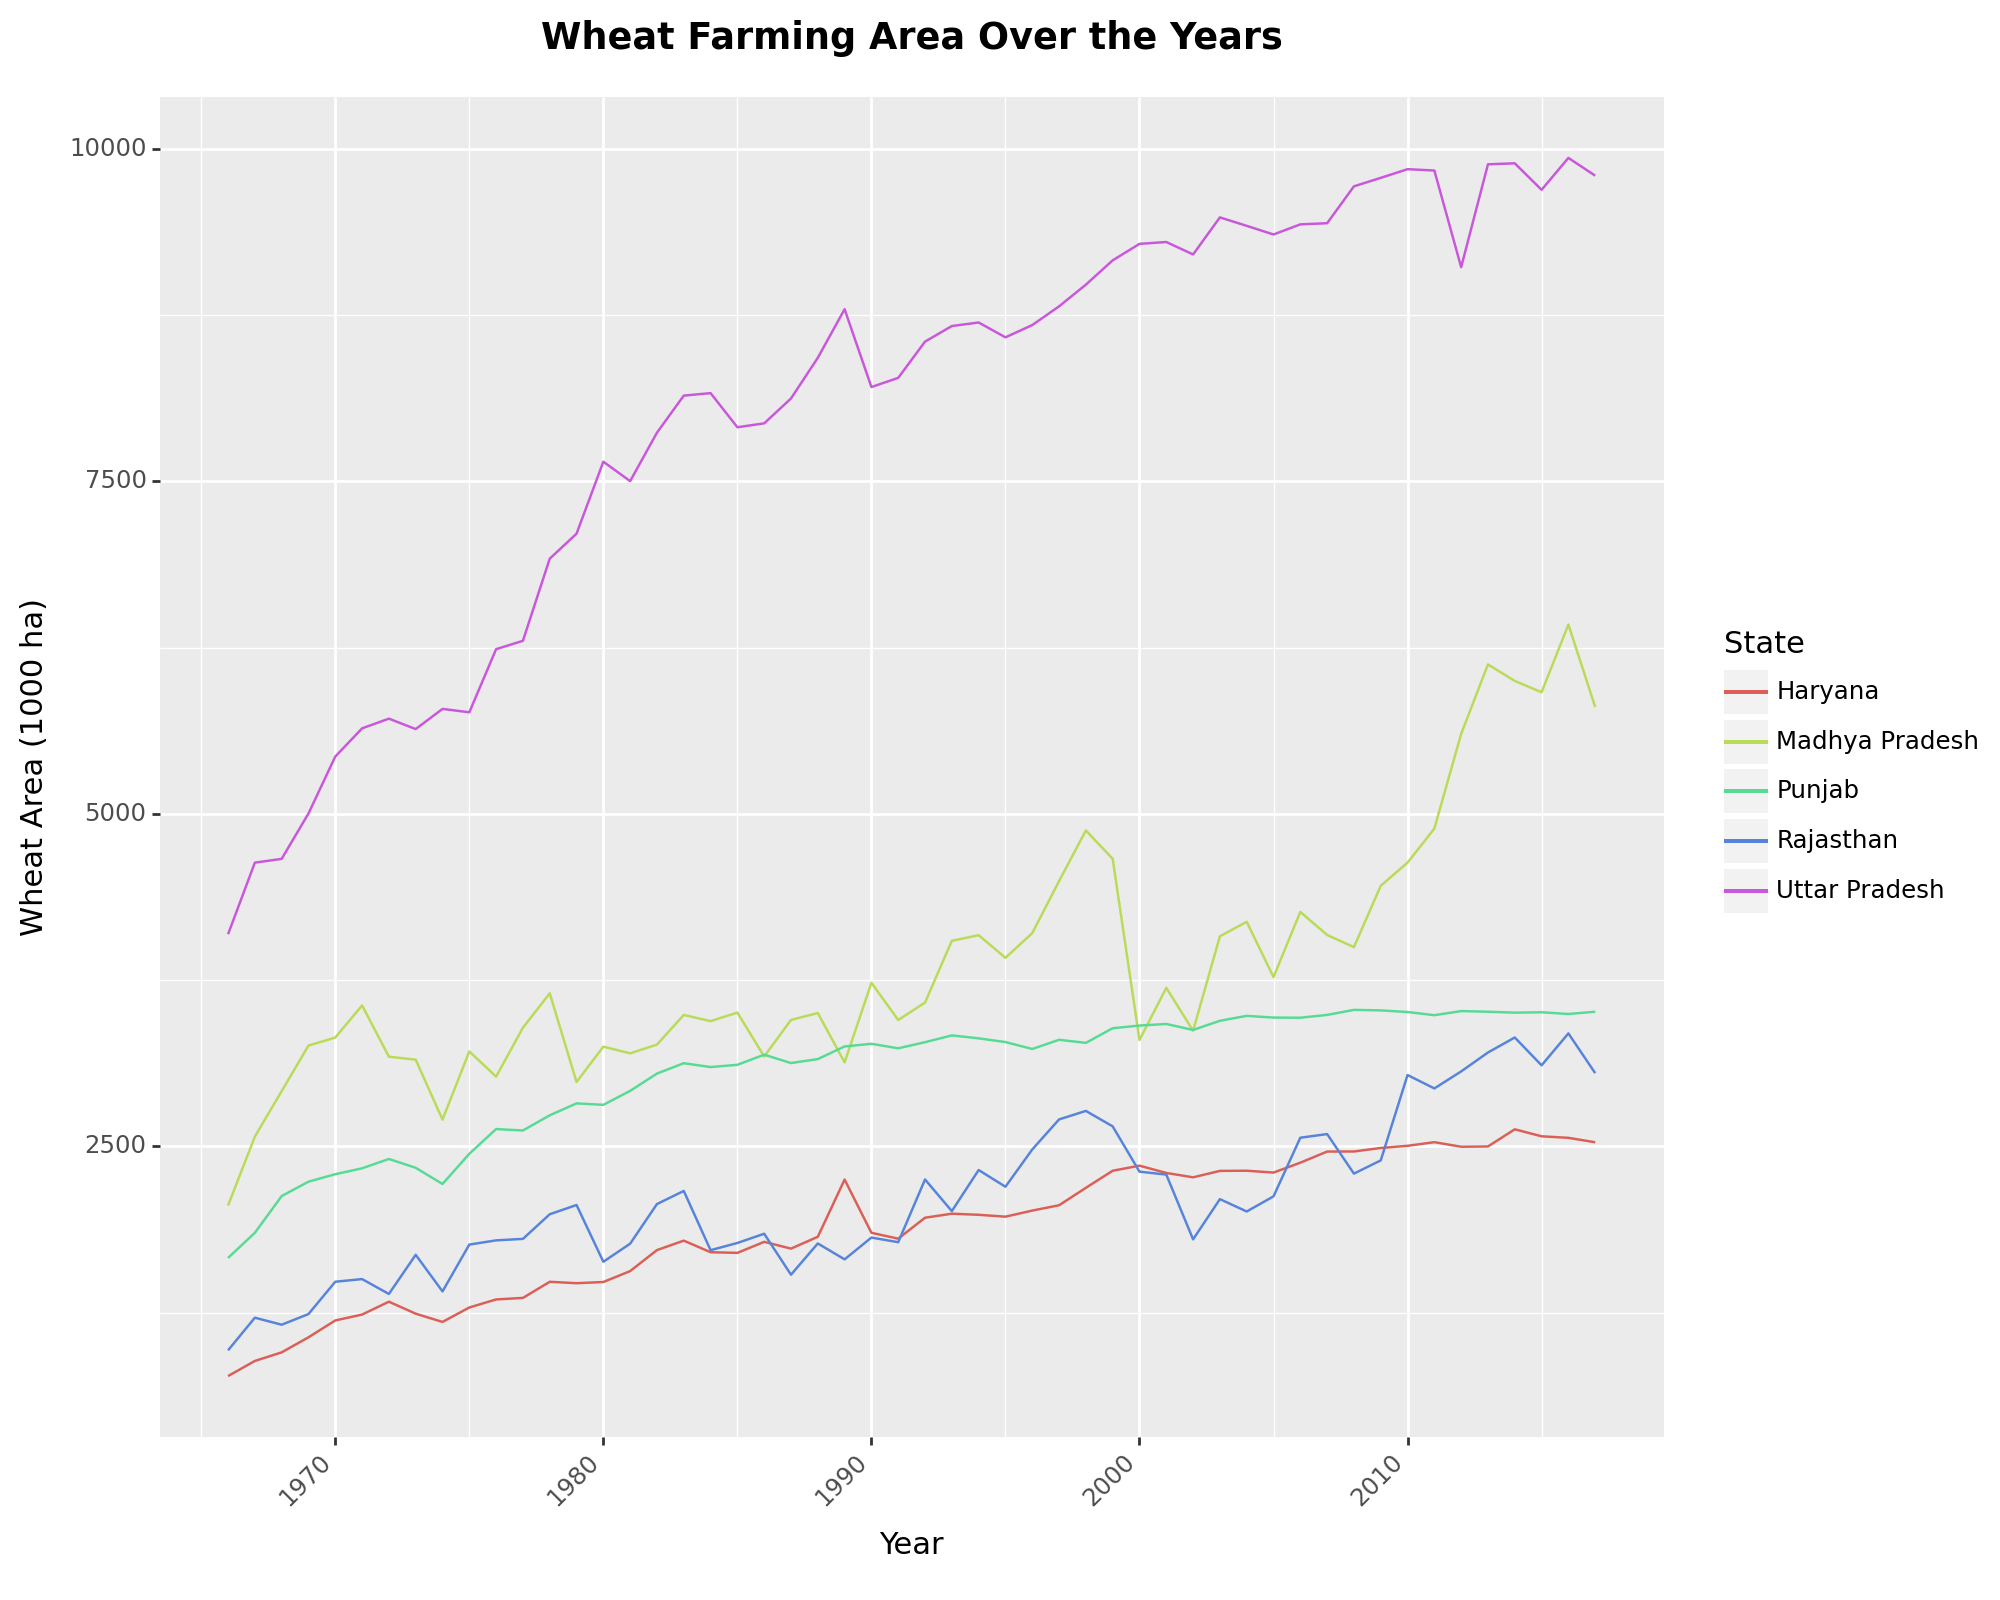

<Figure Size: (1000 x 800)>

In [65]:
selected_states = ['Haryana', 'Uttar Pradesh', 'Punjab', 'Rajasthan', 'Madhya Pradesh']


dfricea = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'WHEAT AREA (1000 ha)']]

dfricea.columns = ['Year', 'State', 'WHEAT AREA (1000 ha)']
dfricea.reset_index(drop=True, inplace=True)

(
    ggplot(dfricea, aes(x='Year', y='WHEAT AREA (1000 ha)', color='State')) +
    geom_line() +
    labs(title='Wheat Farming Area Over the Years', x='Year', y='Wheat Area (1000 ha)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)


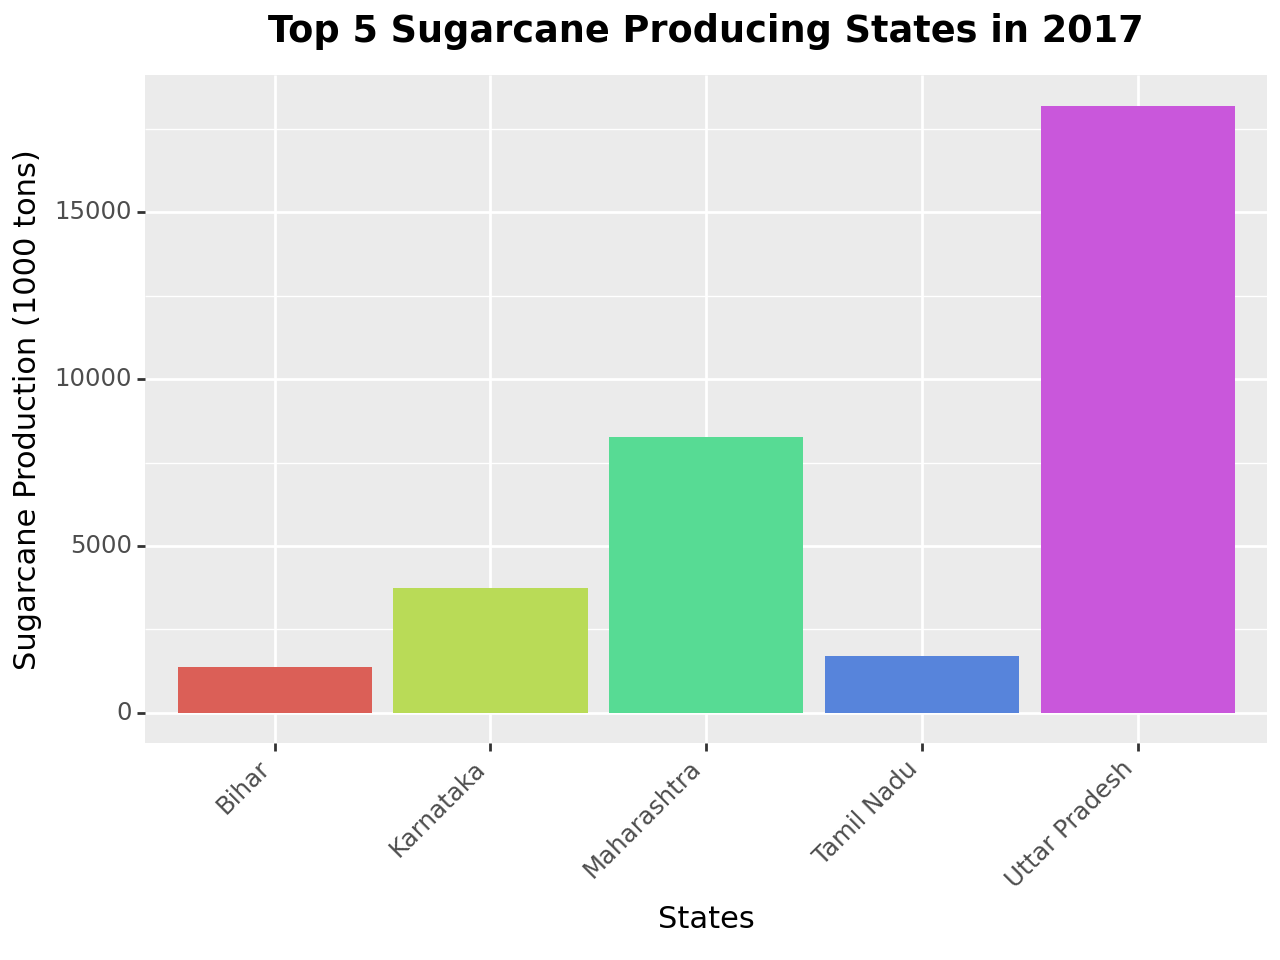

In [88]:
#sugarcane
df_2017_sugarsorted = df_2017.sort_values(by='SUGARCANE PRODUCTION (1000 tons)', ascending=False)

# Select top 5 rice-producing states
top_5_sugar_states = df_2017_sugarsorted.head(5)

# Plotting
plot = (
    ggplot(top_5_sugar_states, aes(x='State Name', y='SUGARCANE PRODUCTION (1000 tons)', fill='State Name')) +
    geom_bar(stat='identity') +
    labs(title='Top 5 Sugarcane Producing States in 2017', x='States', y='Sugarcane Production (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(legend_position='none')+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

# Display the plot
print(plot)

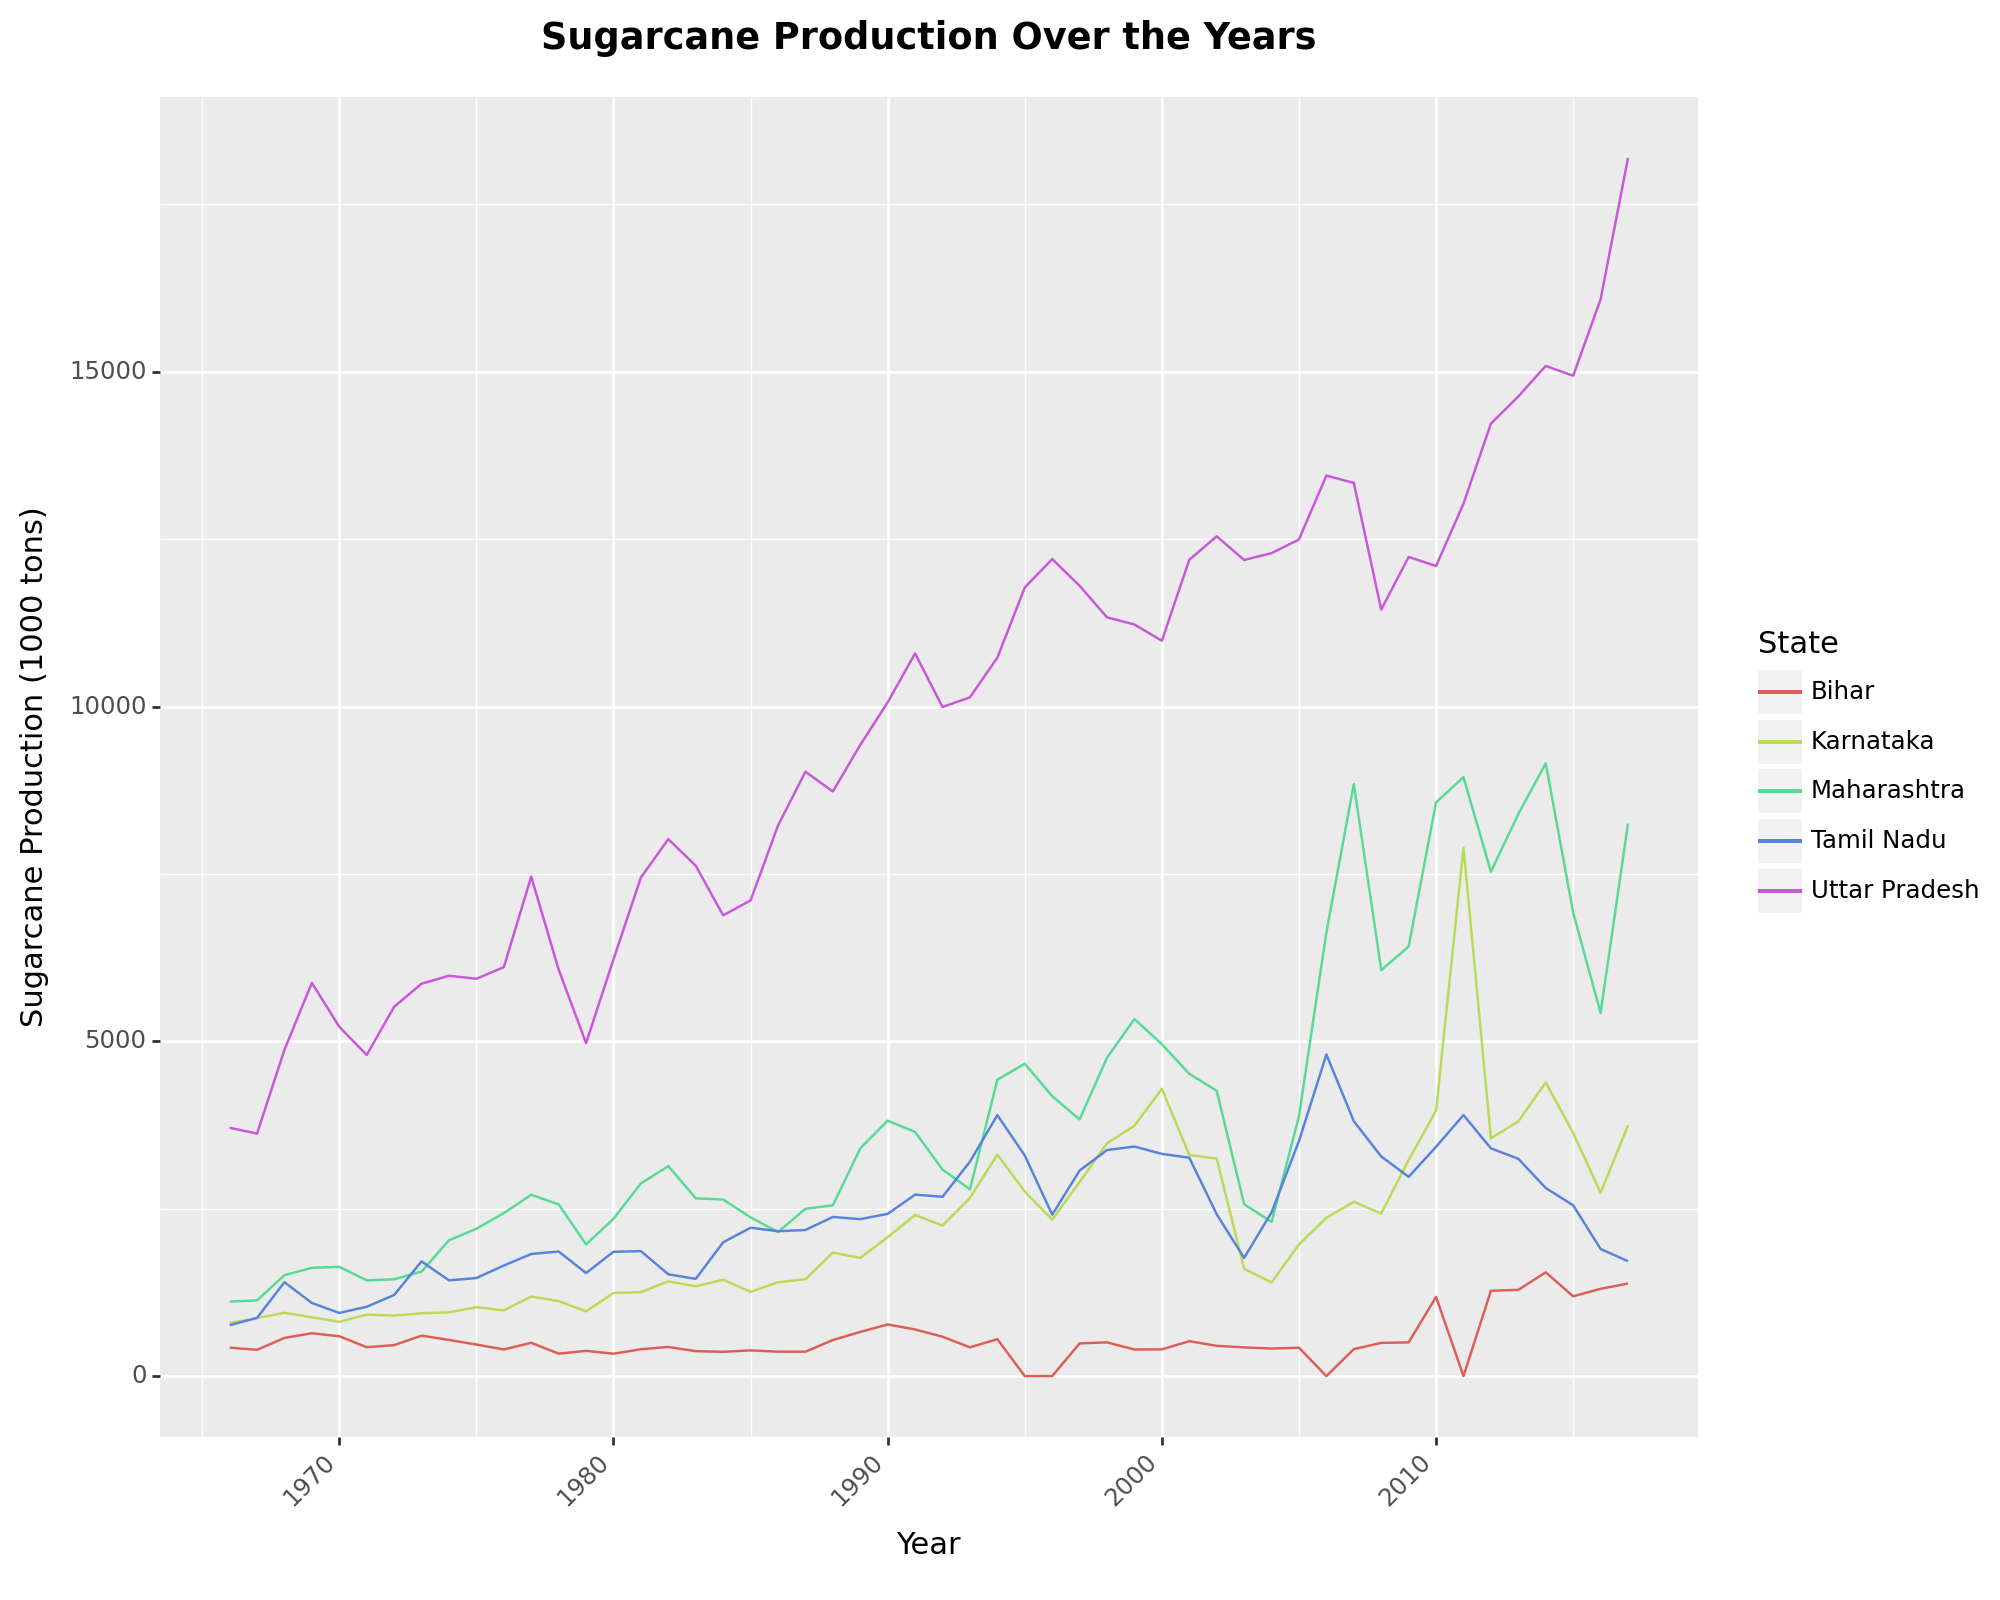

In [67]:
selected_states = ['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu', 'Bihar', 'Karnataka']

# Filter the original dataset for selected states and relevant columns
dfsugarcane = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'SUGARCANE PRODUCTION (1000 tons)']]

# Rename columns for clarity
dfsugarcane.columns = ['Year', 'State', 'SUGARCANE PRODUCTION (1000 tons)']

# Reset index
dfsugarcane.reset_index(drop=True, inplace=True)
# Plotting
plot = (
    ggplot(dfsugarcane, aes(x='Year', y='SUGARCANE PRODUCTION (1000 tons)', color='State')) +
    geom_line() +
    labs(title='Sugarcane Production Over the Years', x='Year', y='Sugarcane Production (1000 tons)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

# Display the plot
print(plot)

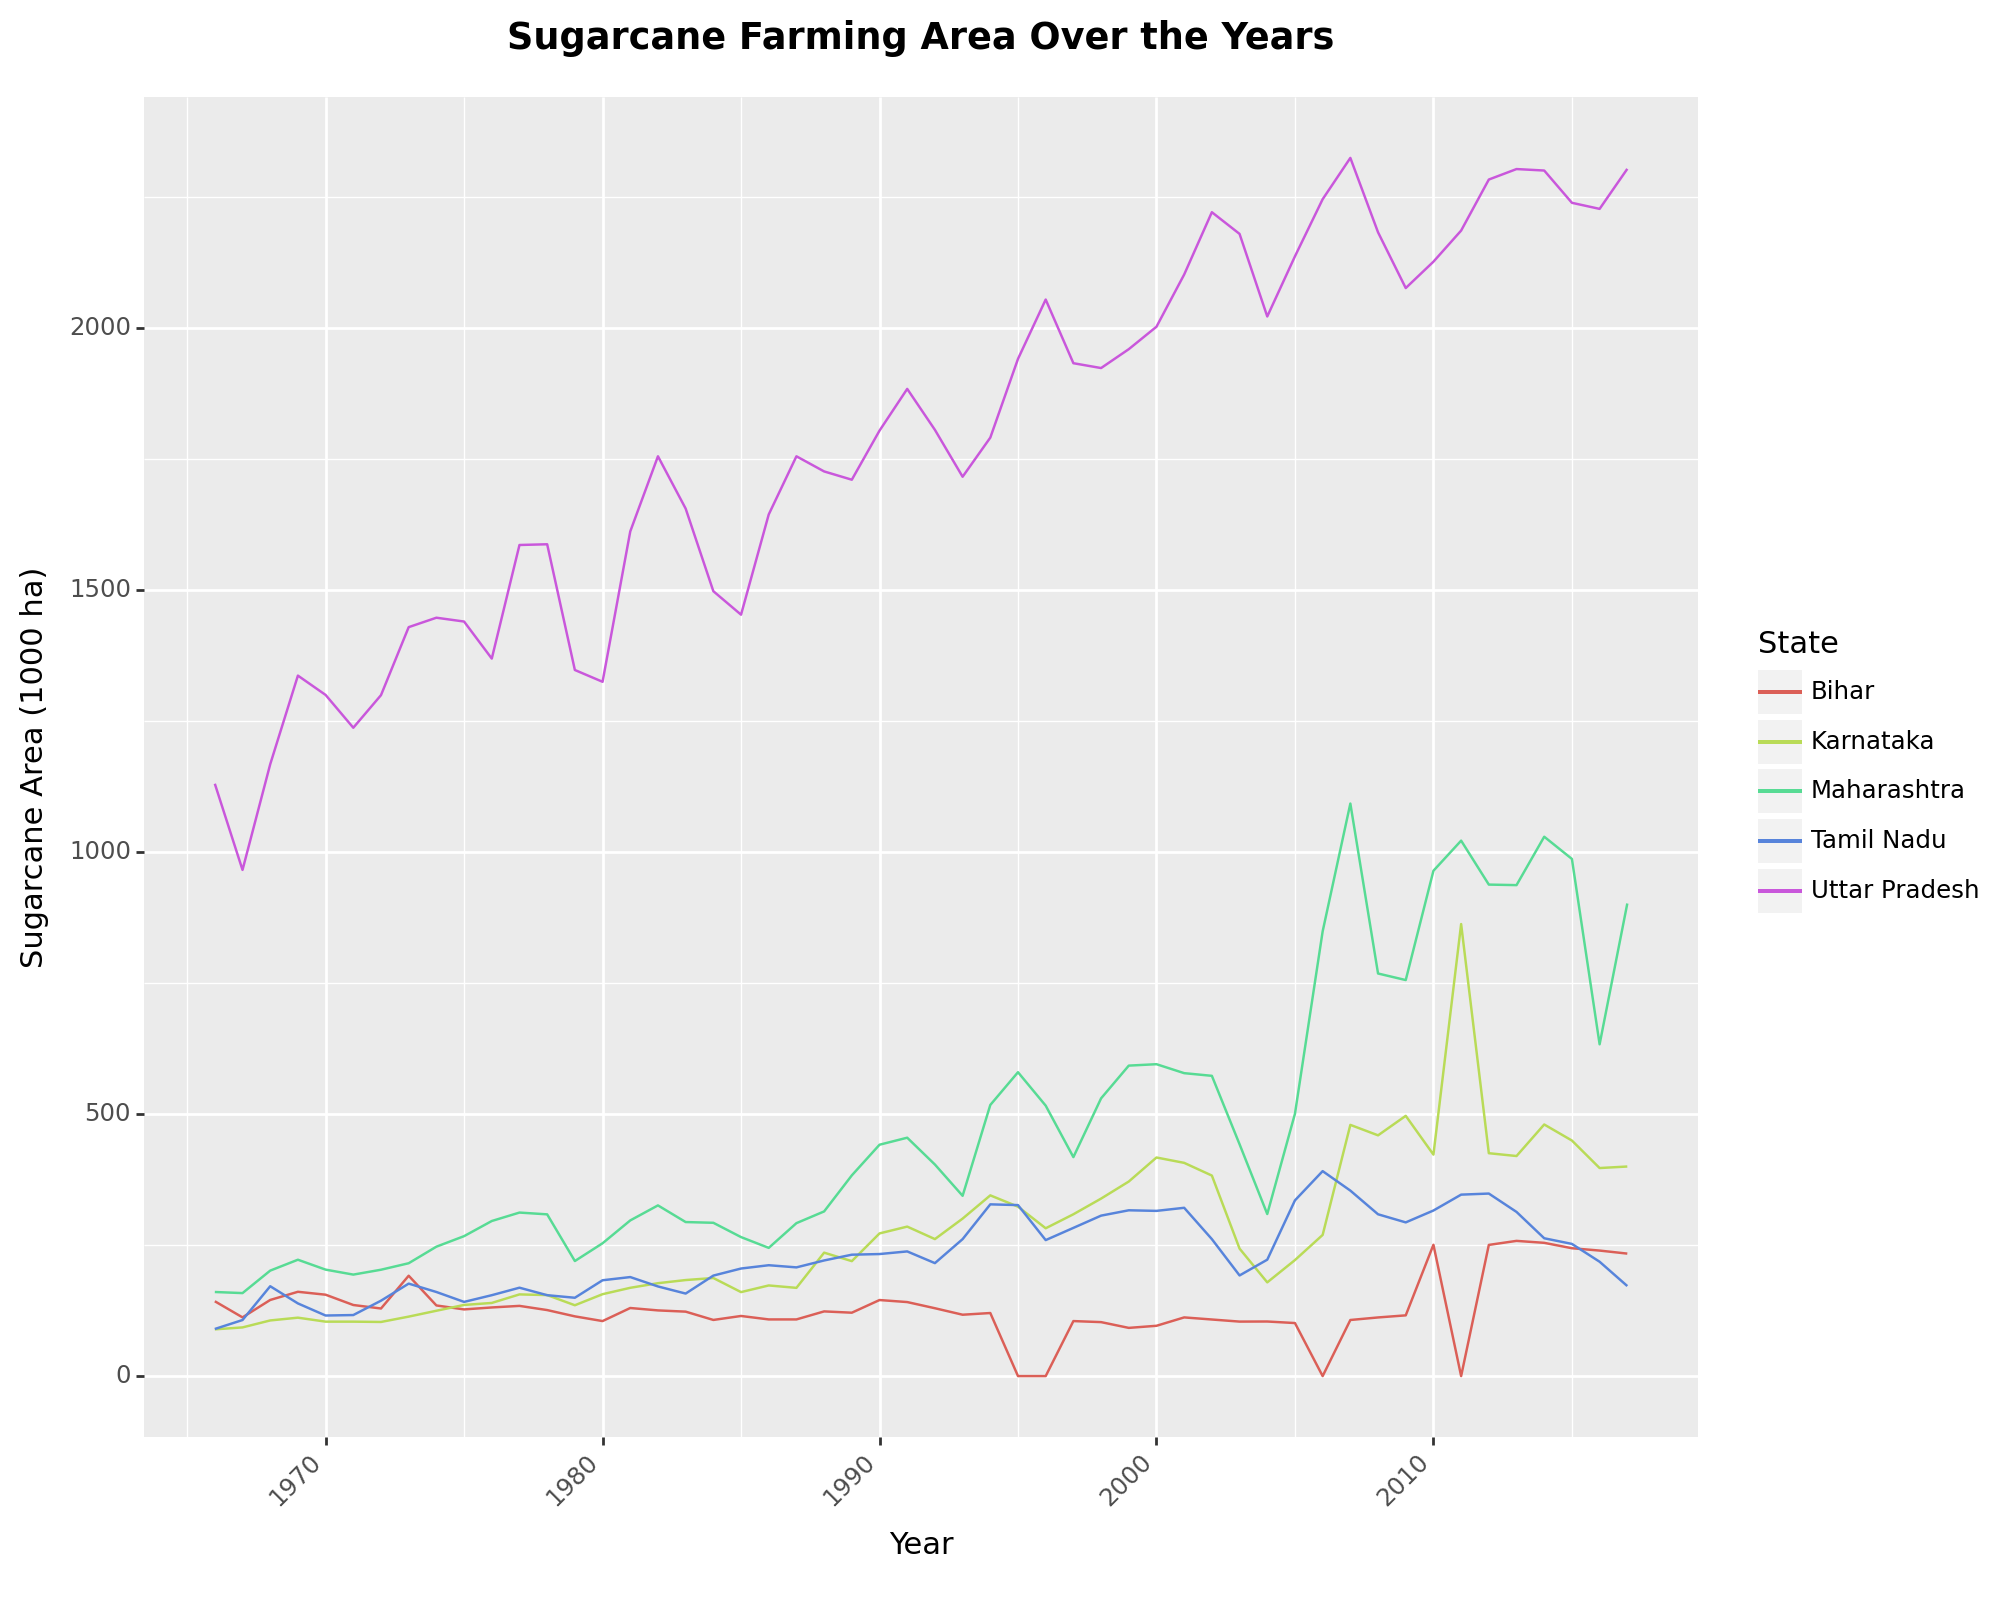

<Figure Size: (1000 x 800)>

In [68]:
selected_states = ['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu', 'Bihar', 'Karnataka']


dfricea = df1[df1['State Name'].isin(selected_states)][['Year', 'State Name', 'SUGARCANE AREA (1000 ha)']]

dfricea.columns = ['Year', 'State', 'SUGARCANE AREA (1000 ha)']
dfricea.reset_index(drop=True, inplace=True)

(
    ggplot(dfricea, aes(x='Year', y='SUGARCANE AREA (1000 ha)', color='State')) +
    geom_line() +
    labs(title='Sugarcane Farming Area Over the Years', x='Year', y='Sugarcane Area (1000 ha)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))+
    theme(figure_size=(10, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

#RAINFALL Analysis

In [69]:
states = ['Chhattisgarh', 'East Madhya Pradesh', 'Coastal Andhra Pradesh', 'Telangana', 'North Interior Karnataka',
                  'Tamil Nadu', 'Madhya Maharashtra', 'Gujarat Region', 'West Rajasthan', 'Punjab', 'Haryana Delhi & Chandigarh',
                  'East Uttar Pradesh', 'Uttarakhand', 'Assam & Meghalaya', 'Himachal Pradesh', 'Kerala',
                  'Orissa', 'Gangetic West Bengal', 'Bihar', 'Jharkhand']

rain=pd.read_csv(rainfall)
rain1 = rain[(rain['YEAR'] >= 1997) & (rain['YEAR'] <= 2017) & (rain['States/UTs'].isin(states)) ].reset_index()

In [70]:
rain1=rain1.rename(columns={'States/UTs': 'State'})
rain1=rain1.drop(columns=['index', 'Unnamed: 0'])


In [71]:
state_mapping = {
    'Gangetic West Bengal': 'West Bengal',
    'Assam & Meghalaya': 'Assam',
    'Gujarat Region': 'Gujarat',
    'East Uttar Pradesh': 'Uttar Pradesh',
    'Haryana Delhi & Chandigarh': 'Haryana',
    'West Rajasthan': 'Rajasthan',
    'East Madhya Pradesh': 'Madhya Pradesh',
    'Madhya Maharashtra': 'Maharashtra',
    'Coastal Andhra Pradesh': 'Andhra Pradesh',
    'North Interior Karnataka': 'Karnataka'
}

# Replace values in the 'State' column based on the mapping
rain1['State'] = rain1['State'].replace(state_mapping)

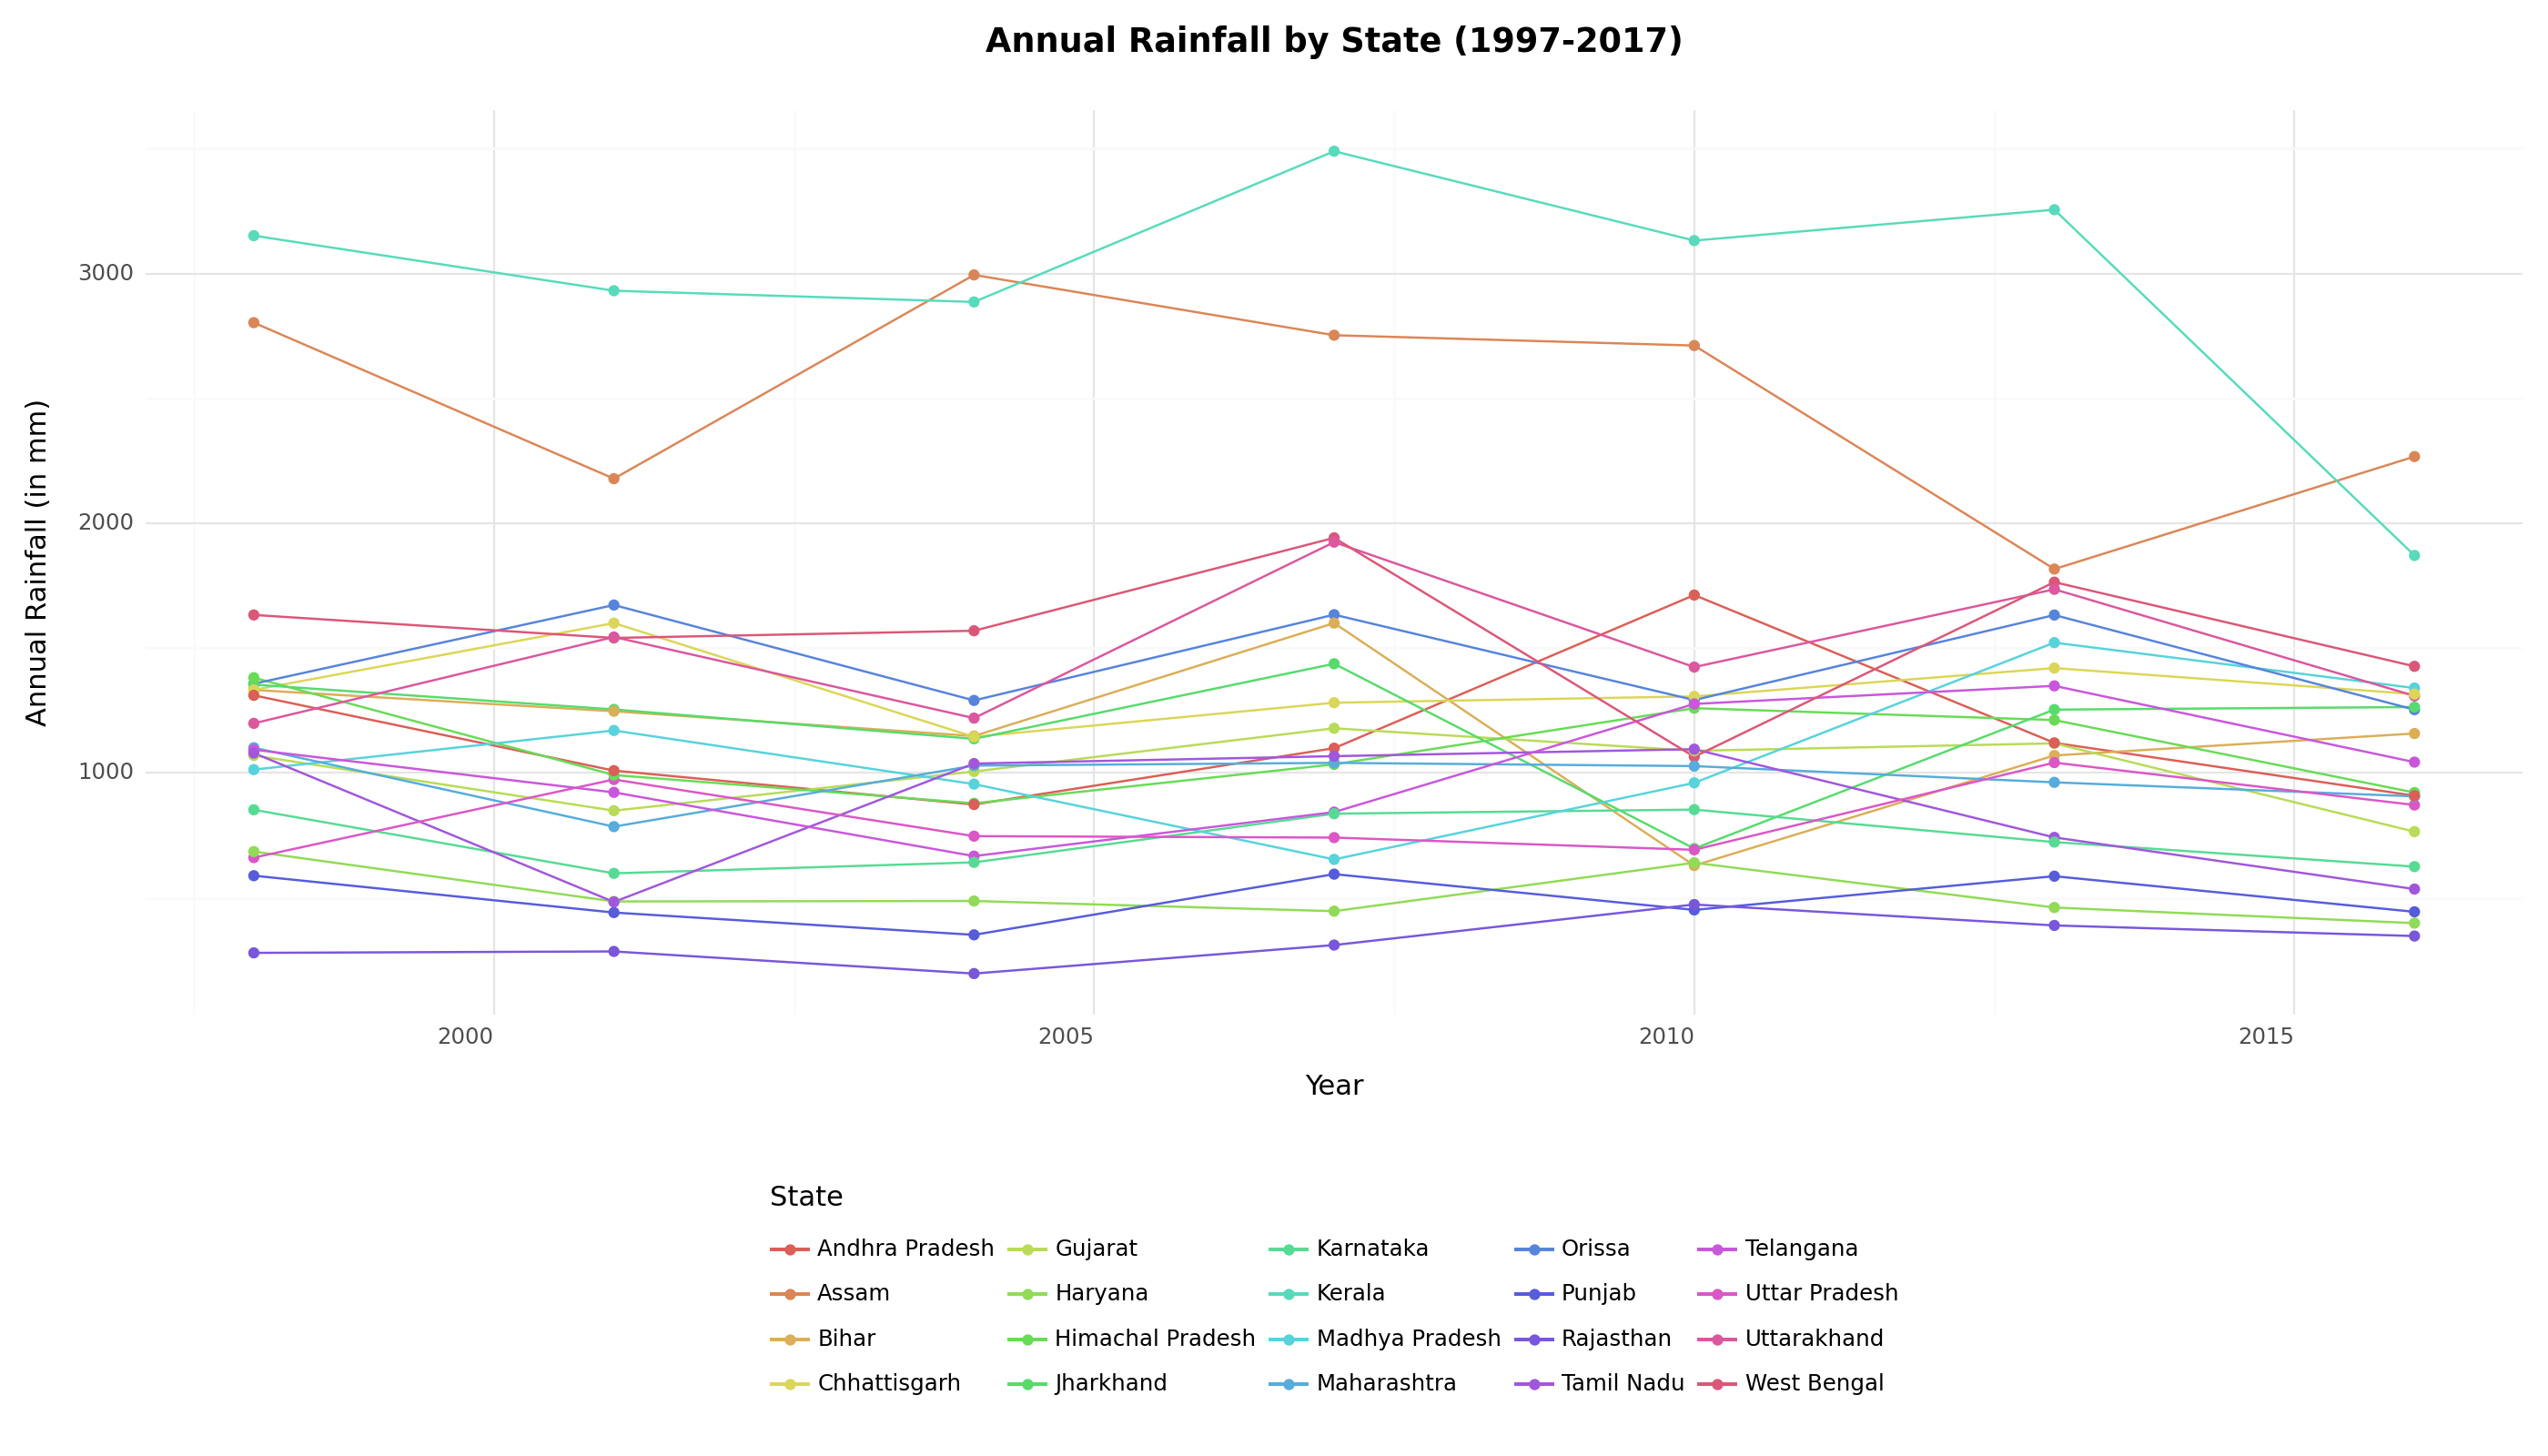

<Figure Size: (1400 x 800)>

In [72]:
rain1_every_three_years = rain1[rain1['YEAR'] % 3 == 0]

(
    ggplot(rain1_every_three_years, aes(x='YEAR', y='ANNUAL', color='State')) +
    geom_line() +
    geom_point() +
    theme_minimal() +
    labs(title='Annual Rainfall by State (1997-2017)', x='Year', y='Annual Rainfall (in mm)') +
    theme(axis_text_x=element_text(angle=0, hjust=1)) +
    theme(legend_position='bottom') +
    theme(figure_size=(14, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)

In [73]:
rain2017 = rain[rain['YEAR'] == 2017]
rain2017=rain2017.rename(columns={'States/UTs': 'State'})
rain2017 = rain2017[['State', 'ANNUAL']]

rain2017['State'] = rain2017['State'].replace(state_mapping)
rain2017.reset_index(drop=True, inplace=True)

In [74]:
sns.set_style('whitegrid')


map_df = gpd.read_file(shp_path, shx=shx_path)
dbf_df = gpd.read_file(dbf_path)

column_names = map_df.columns.tolist()

# Print the list of column names
print(column_names)
state_ut=map_df['STATE'].tolist()
geometry = map_df['geometry'].tolist()


['STATE', 'geometry']


In [75]:
rain2017['State'] = rain2017['State'].str.upper()
merged = map_df.set_index('STATE').join(rain2017.set_index('State'))
merged.head()


geometry  \
STATE                                                                            
ANDAMAN AND NICOBAR ISLANDS  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...   
ANDHRA PRADESH               POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
ARUNACHAL PRADESH            POLYGON ((95.61476 27.34745, 95.69234 27.33888...   
ASSAM                        POLYGON ((92.82207 25.57781, 92.69672 25.61368...   
BIHAR                        POLYGON ((84.16946 26.28322, 83.91399 26.38523...   

                             ANNUAL  
STATE                                
ANDAMAN AND NICOBAR ISLANDS     NaN  
ANDHRA PRADESH                892.7  
ARUNACHAL PRADESH            2745.3  
ASSAM                        2711.7  
BIHAR                        1112.0

<Axes: title={'center': 'ANNUAL RAINFALL(2017)'}>

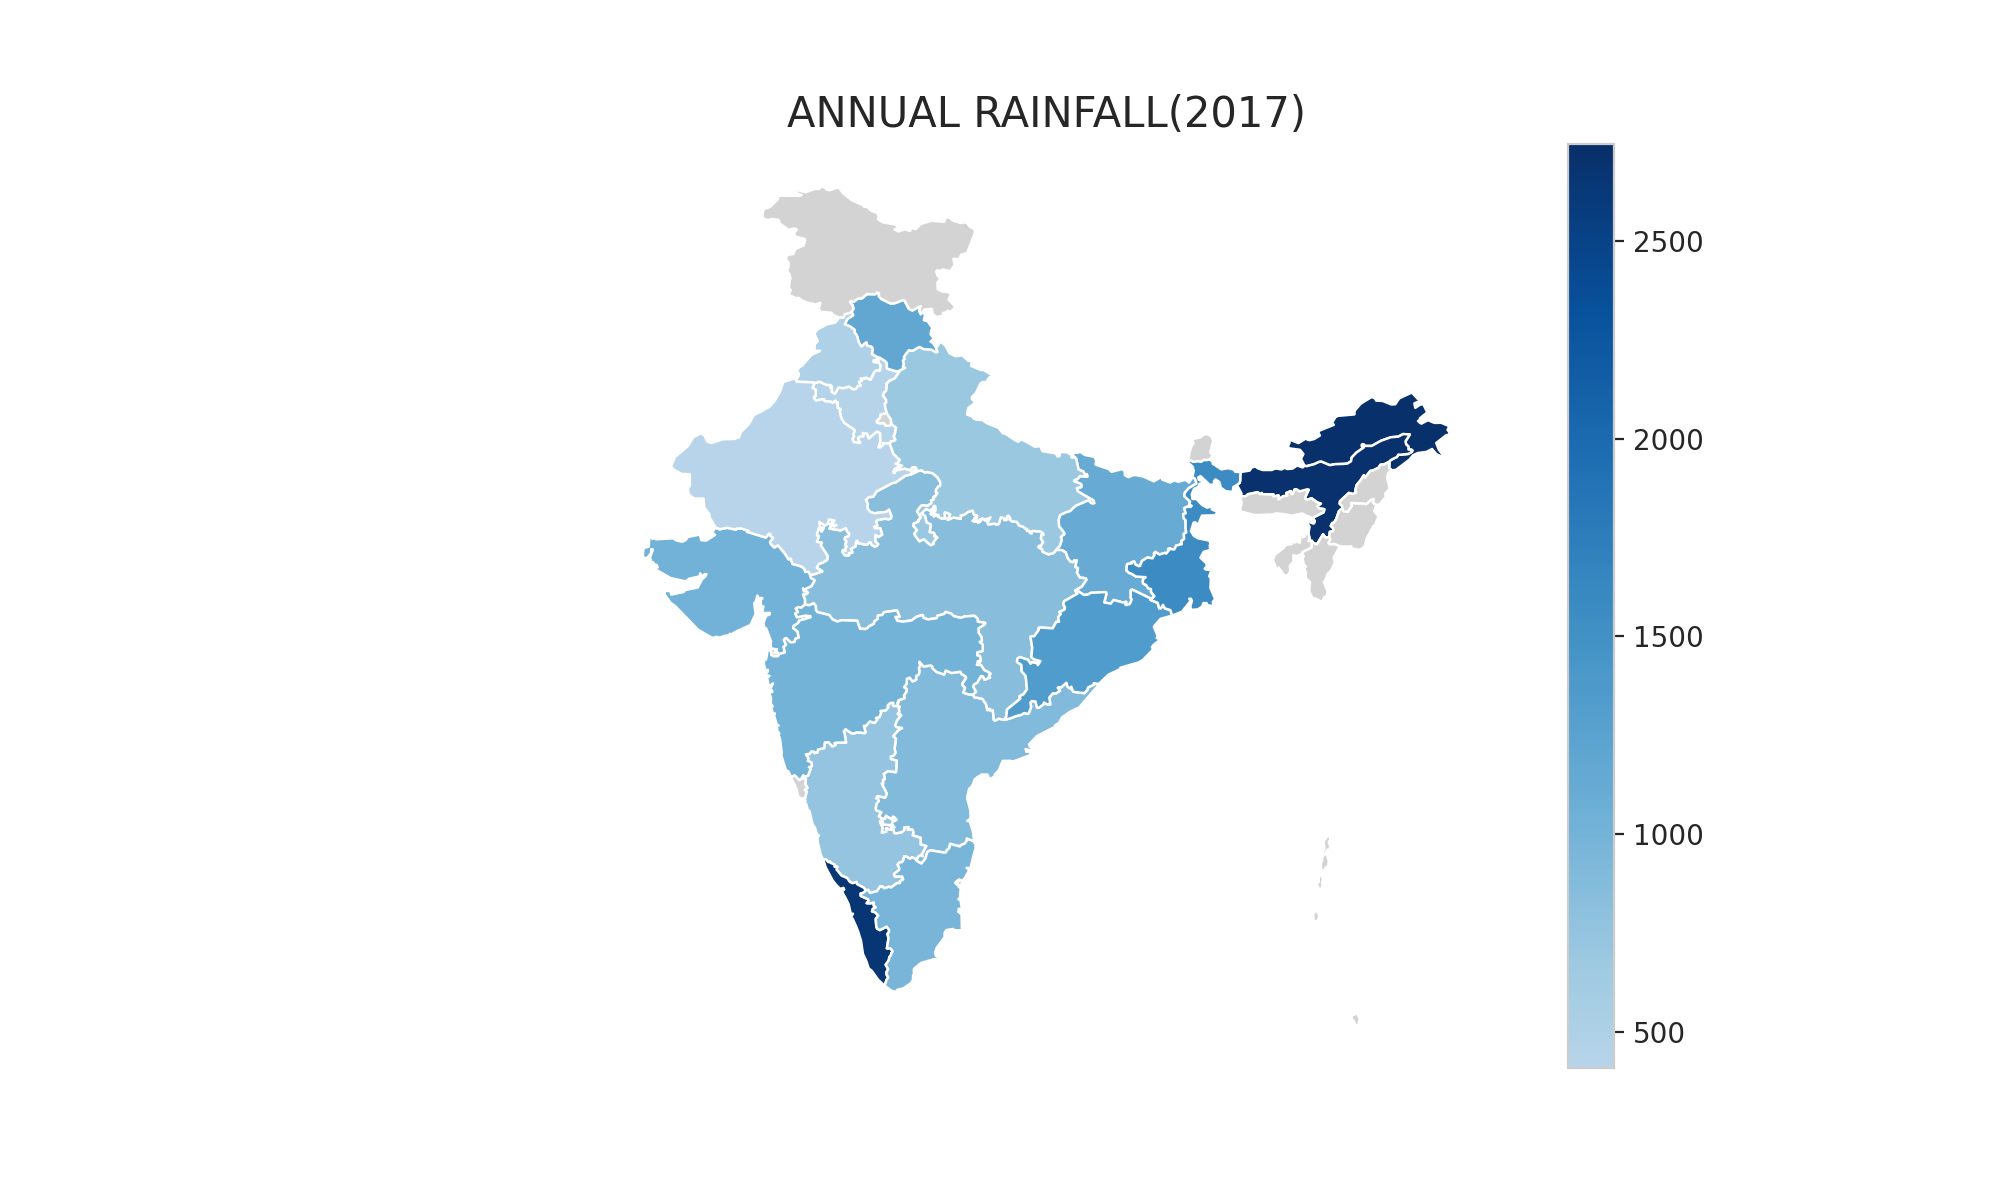

In [76]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),cmap(np.linspace(minval, maxval, n)))
    return new_cmap
arr = np.linspace(0, 50, 100).reshape((10, 10))

cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.3, 1)
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('ANNUAL RAINFALL(2017)', fontdict={'fontsize': '15', 'fontweight' : '3'})
merged.plot(column='ANNUAL',
            cmap = truncate_colormap(cmap, 0.3, 1),
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)


In [77]:
rainmonthly17=rain[rain['YEAR'] == 2017]
rainmonthly17=rainmonthly17.rename(columns={'States/UTs': 'State'})
rainmonthly17.drop(columns=['YEAR', 'ANNUAL','Unnamed: 0'], inplace=True)
rainmonthly17['State']=rainmonthly17['State'].replace(state_mapping)
rainmonthly17['State'] = rainmonthly17['State'].str.upper()

In [78]:
rainmonthly17.head()

State    JAN   FEB    MAR    APR    MAY  \
111           ANDAMAN & NICOBAR ISLANDS  228.7   5.6   33.0  108.3  275.8   
210                   ARUNACHAL PRADESH    8.2  86.2  221.8  348.2  257.1   
327                               ASSAM    1.7  37.8  116.7  310.9  268.4   
444              NAGA MANI MIZO TRIPURA    0.8  11.9  125.3  277.6  196.7   
561  SUB HIMALAYAN WEST BENGAL & SIKKIM    3.0   5.1   84.6  146.8  226.8   

       JUN    JUL    AUG    SEP    OCT    NOV    DEC  
111  349.1  389.4  414.7  372.8  263.0  205.9  243.7  
210  370.8  437.8  456.4  318.6  227.1    9.9    3.4  
327  485.2  429.0  483.1  345.4  212.1   10.3   11.0  
444  502.7  431.5  543.3  352.2  287.6    7.6   68.1  
561  400.6  478.6  777.9  390.1  166.5    3.8    1.0

#FARM Equipment

In [79]:
#Tractor
tractor=pd.read_csv(track)
tractor=tractor.fillna(0)
tractor.drop(columns=['District/Year'], inplace=True)

In [80]:
tractor.head()

2018  2017  2016  2015  2014  2013  2012  2011  2010  2009  ...  1985  \
0  71.0  71.0  72.0  72.0  72.0  72.0  72.0  62.0  61.0  61.0  ...  22.0   
1  22.0  22.0  22.0  22.0  22.0  22.0  23.0   0.0   0.0   0.0  ...   0.0   
2  46.0  46.0  46.0  46.0  45.0  42.0  44.0  44.0  44.0  45.0  ...  24.0   
3  55.0  55.0  55.0  54.0  54.0  54.0  54.0  54.0  54.0  54.0  ...   0.0   
4  81.0  81.0  81.0  80.0  80.0  80.0  80.0  77.0  78.0  77.0  ...  39.0   

   1984  1983  1982  1981  1980  1979  1978  1977  1976  
0  20.0  17.0  17.0  16.0   0.0  10.0   0.0   9.0   9.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  20.0  22.0  21.0  21.0   0.0  16.0   0.0  14.0  12.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  30.0  32.0  31.0  31.0   0.0  26.0   0.0  21.0  19.0  

[5 rows x 43 columns]

In [81]:
column_sums = tractor.sum()
track=pd.DataFrame(column_sums, columns=['sum'])
track.reset_index(inplace=True)
track.head()

index     sum
0  2018  1811.0
1  2017  1787.0
2  2016  1764.0
3  2015  1723.0
4  2014  1716.0

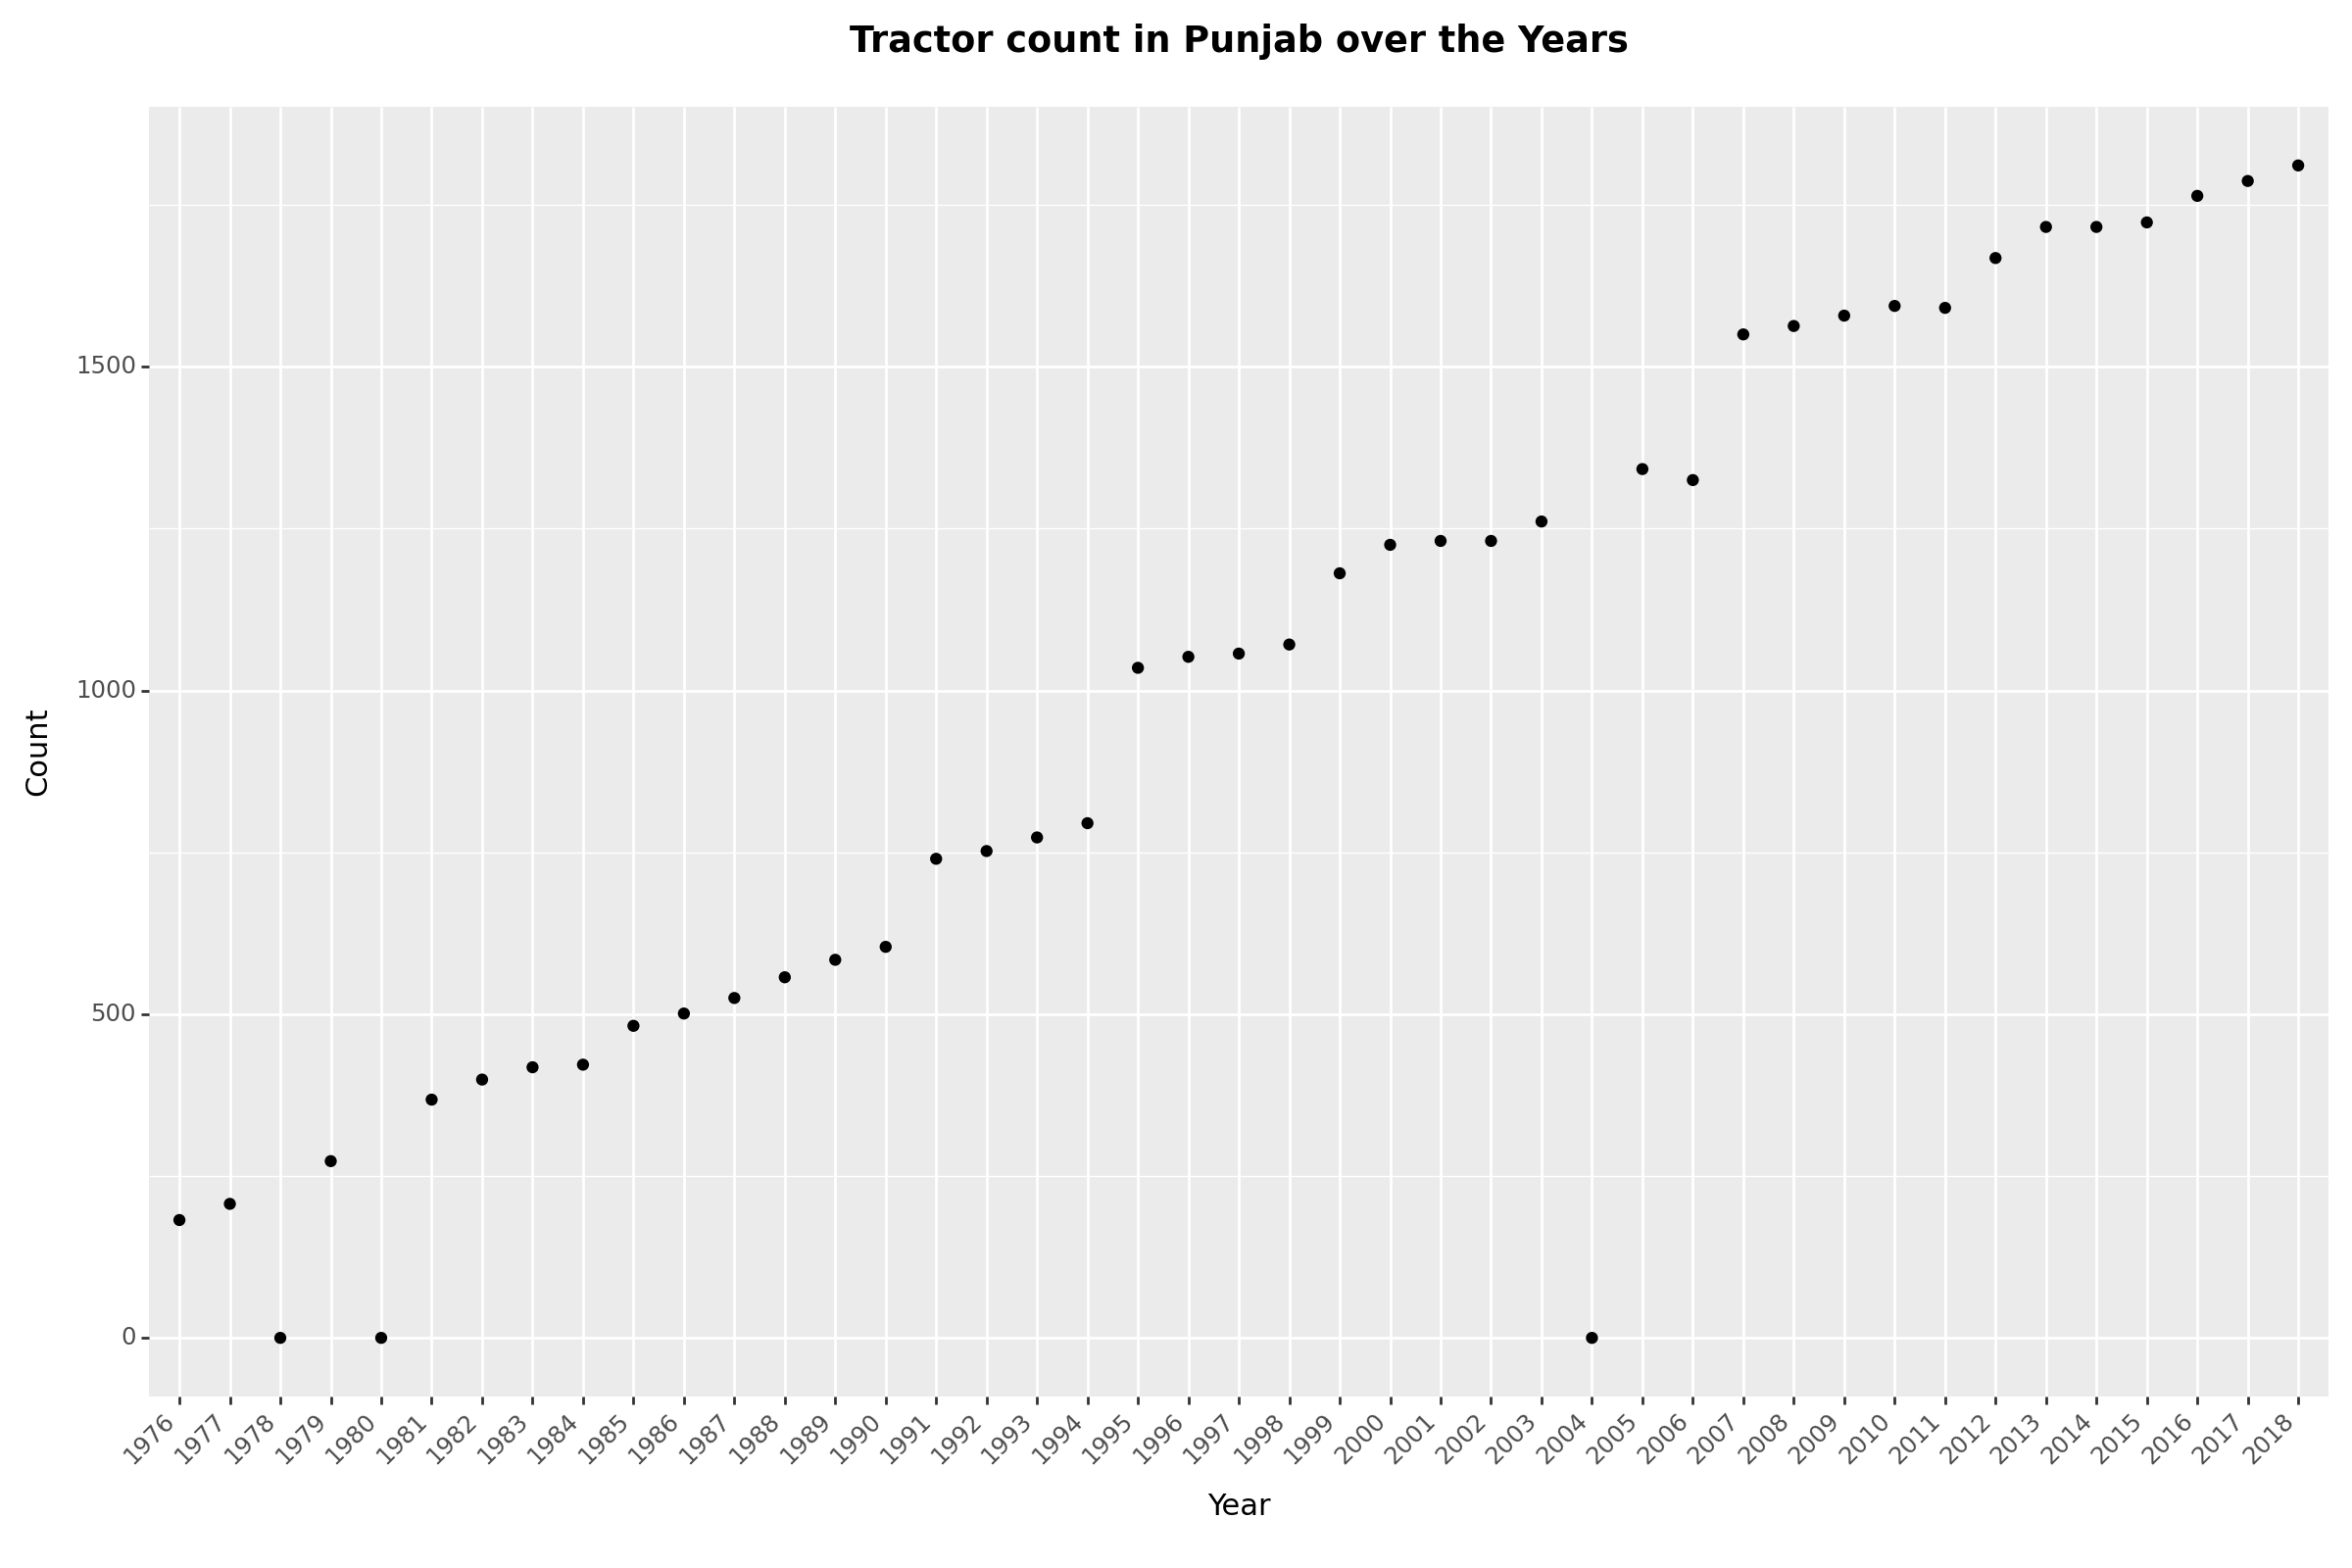

<Figure Size: (1200 x 800)>

In [82]:
track.columns = ['Column', 'Sum']

# Create scatter plot
(
    ggplot(track, aes(x='Column', y='Sum')) +
    geom_point() +
    labs(title='Tractor count in Punjab over the Years', x='Year', y='Count')+
    theme(axis_text_x=element_text(angle=45, hjust=1))+
    theme(figure_size=(12, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))

)

In [83]:
punjab_data = df1[df1['State Name'] == 'Punjab']
required_columns = ['Year', 'SUNFLOWER PRODUCTION (1000 tons)', 'OILSEEDS PRODUCTION (1000 tons)', 'COTTON PRODUCTION (1000 tons)']
punjab = punjab_data[required_columns]


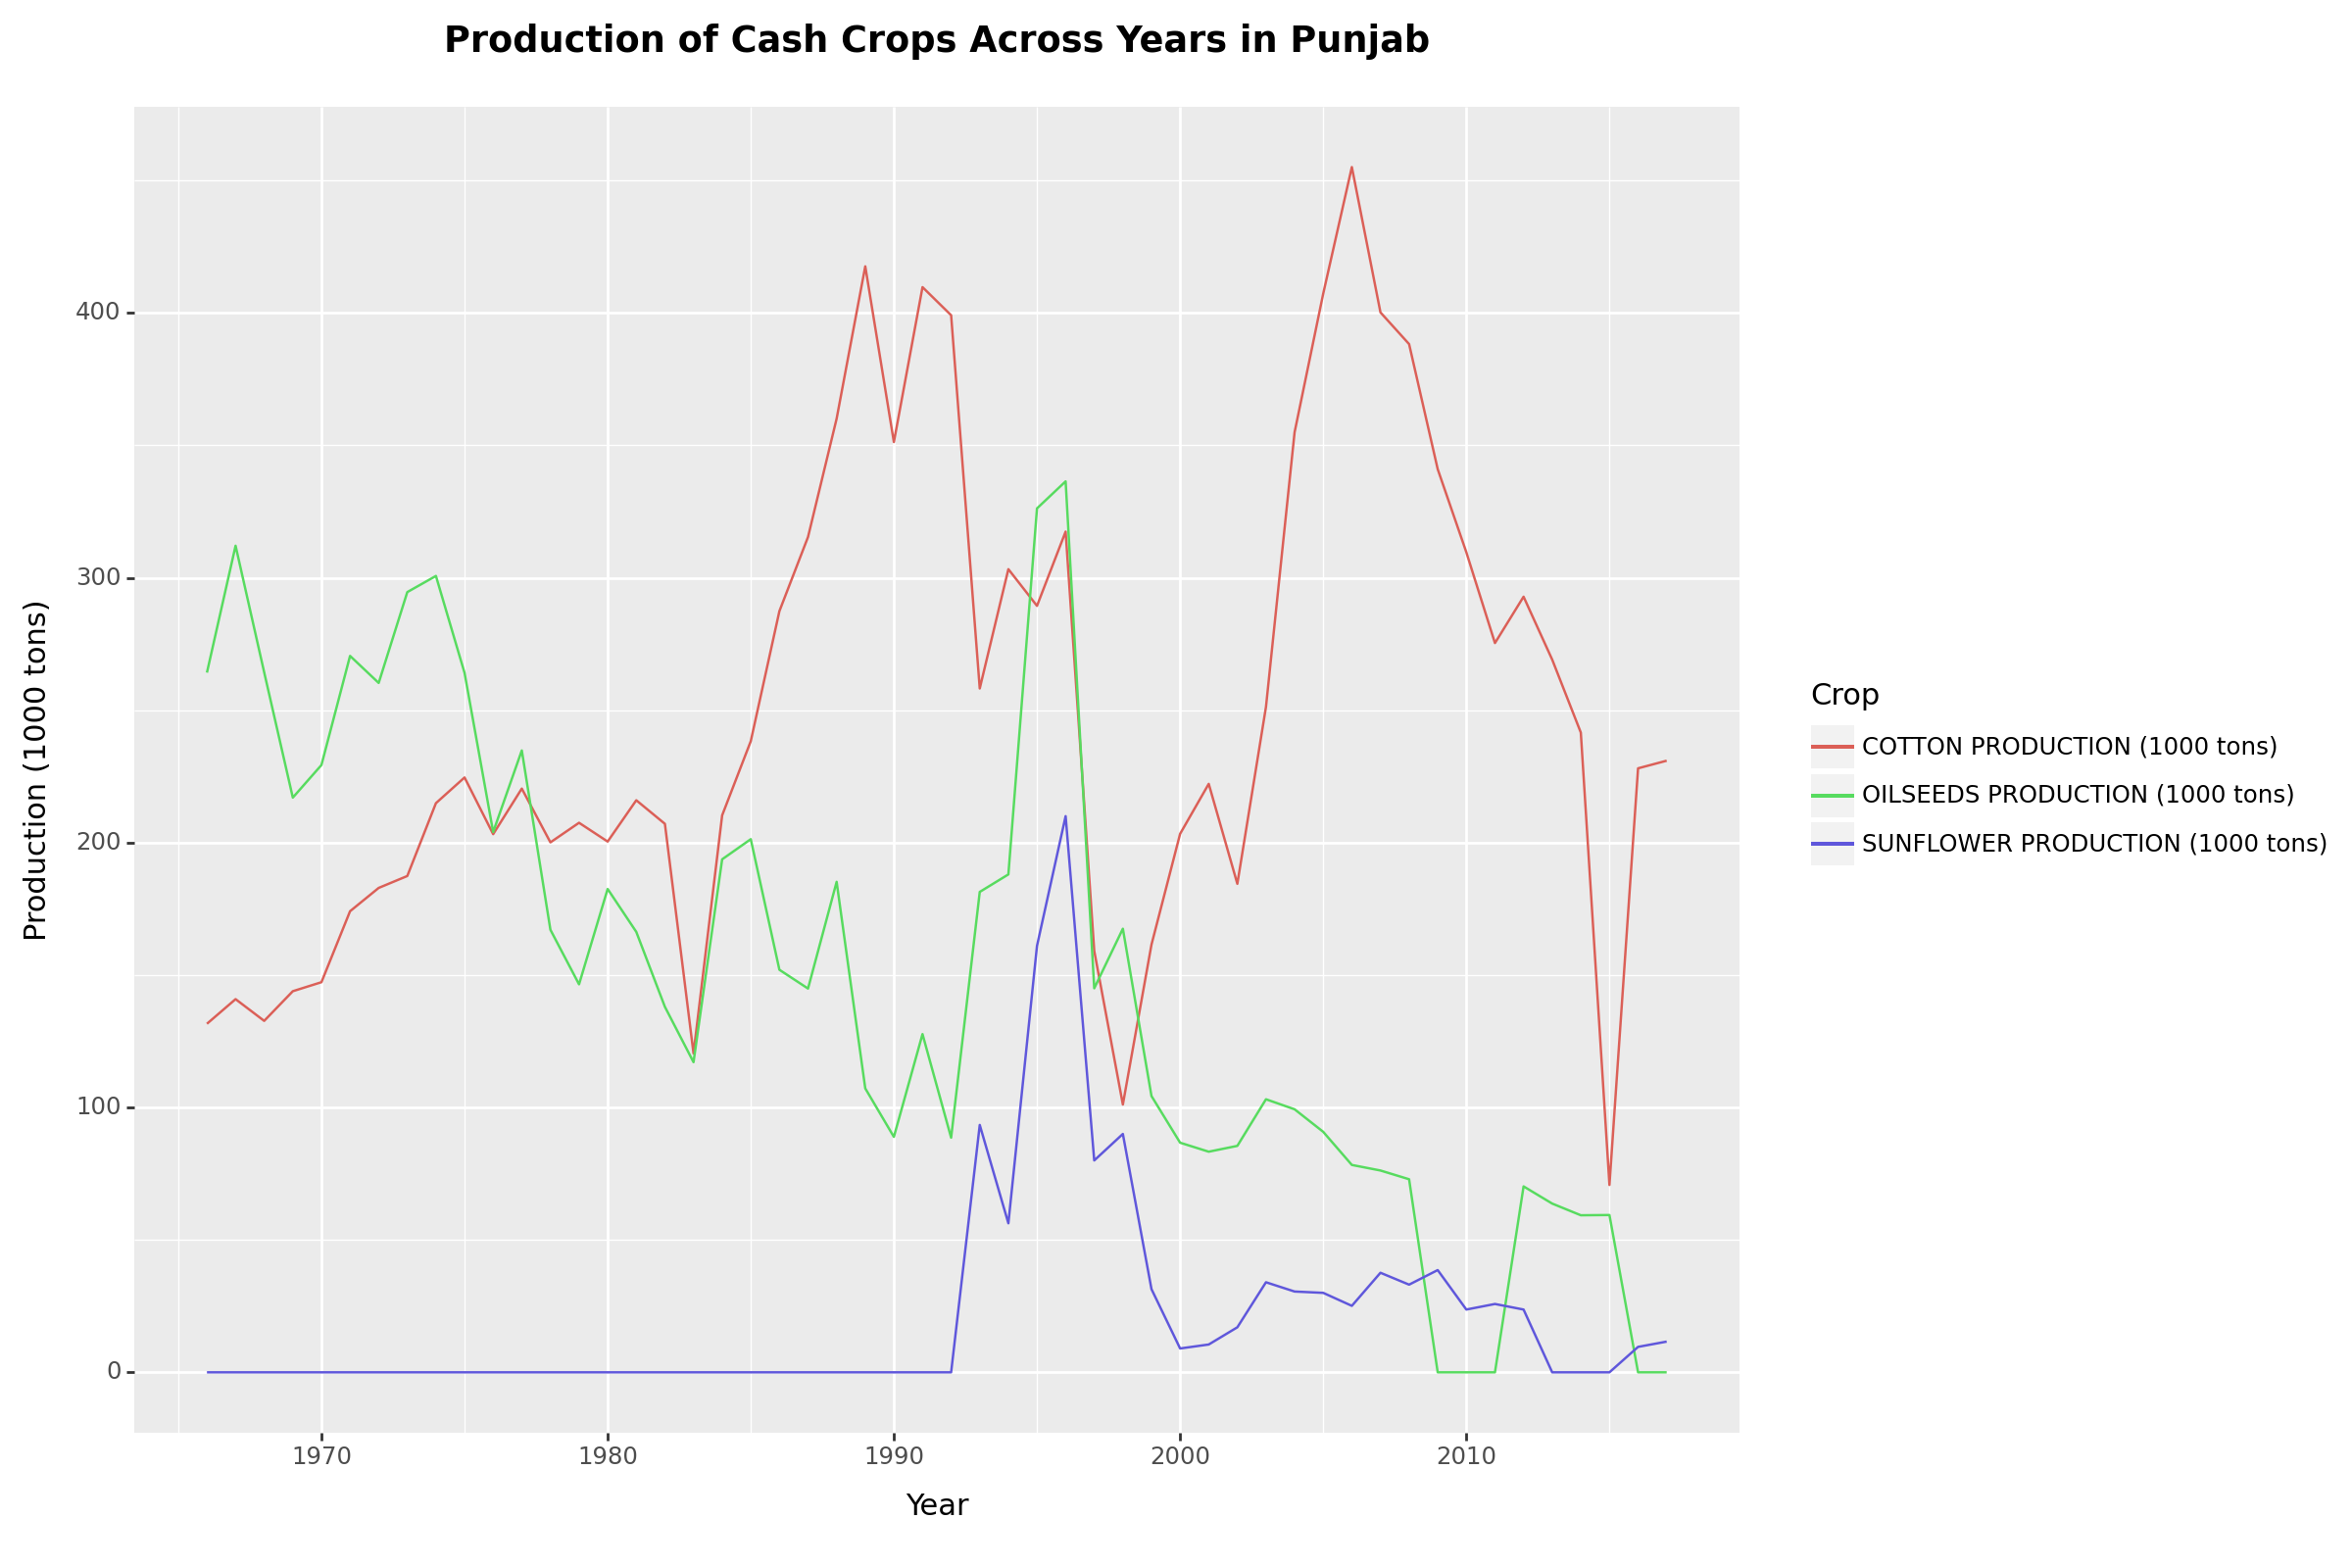

<Figure Size: (1200 x 800)>

In [84]:
punjabdf_melted = punjab.melt(id_vars='Year', var_name='Crop', value_name='Production')
(
    ggplot(punjabdf_melted, aes(x='Year', y='Production', color='Crop')) +
    geom_line() +
    labs(title='Production of Cash Crops Across Years in Punjab', x='Year', y='Production (1000 tons)')+
    theme(figure_size=(12, 8))+
    theme(plot_title=element_text(hjust=0.5, face='bold'))
)


#Fertiliser

In [ ]:
fert=pd.read_csv(fert)
fert.drop(columns=['Unnamed: 3', 'Unnamed: 4'], inplace=True)
fert.head()

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


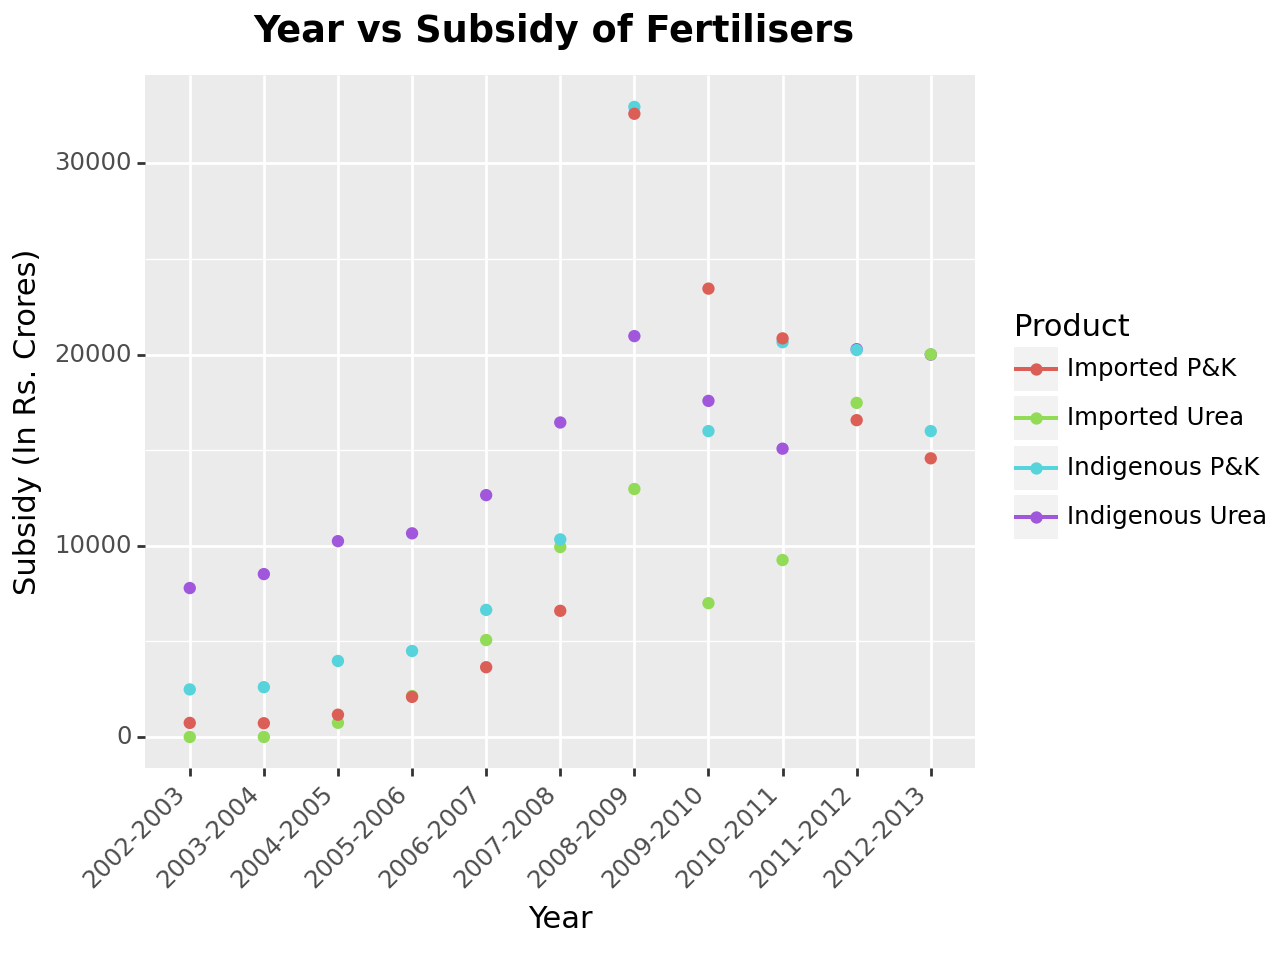

<Figure Size: (640 x 480)>

In [86]:
(ggplot(fert, aes(x='Year', y='Subsidy(In Rs.Crores)', color='Product')) +
 geom_line() +
 geom_point() +
 theme(axis_text_x=element_text(angle=45, hjust=1)) +
 labs(title="Year vs Subsidy of Fertilisers ", x="Year", y="Subsidy (In Rs. Crores)")+
 theme(plot_title=element_text(hjust=0.5, face='bold'))
 )